# Plot figure

In [91]:
import pandas as pd
import numpy as np
import csv
import re
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load path

## Define mice group

In [92]:
# saline = ["AA051"]
# Coke = ["AA041"]
saline = ["AA030","AA034","AA036","AA039","AA042", "AA048", "AA059"]
coke = ["AA017", "AA018","AA027","AA033", "AA044","AA050", "AA057", "AA058", "AA060"]

## Input path

In [93]:
input_path = "/N/project/Cortical_Calcium_Image/data_analysis_Project1_30sec_Oct23th"

# plot

In [94]:
def find_mice_group(group_list,readout):
    mice_df_list = []
    contents = {}
    for i, mouseID in enumerate(group_list):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
#         print(i,mouseID)
        df_list=[]
        mpath = os.path.join(input_path,mouseID)
        days= os.listdir(mpath)
        days.sort()
        contents[mouseID] = []
        for day in days:
            sessions = os.listdir(os.path.join(mpath, day))
            for session in sessions:
                df_list.append(pd.read_csv(os.path.join(mpath, day, session, mouseID + '_' + day + session + '_' + readout + "_10pct_30sec.csv"),index_col = "30sec"))                                      
                contents[mouseID].append(day + '_' + session)
        mice_df_list.append(df_list)
#         print(contents)
    return contents, mice_df_list

In [95]:
def choose_style(session_name):
    color = "red"
    solid = "white"
    if (session_name == "D1_S1" or session_name == "D2_S1"):
        color = "red"
        solid = "white"
    elif (session_name == "D1_S4" or session_name == "D2_S4"):
            color = "red"
            solid = "red"
    elif (session_name == "D4_S1" or session_name == "D6_S1" or session_name == "D7_S1" or session_name == "D8_S1"):
            color = "blue"
            solid = "white"
    elif (session_name == "D4_S4" or session_name == "D6_S4" or session_name == "D7_S4" or session_name == "D8_S4"):
            color = "blue"
            solid = "blue"
    return color, solid

In [96]:
def plot_group_figure(contents, mice_df_list, column_num, n, index_name, column_name):
    average_df = pd.DataFrame()
    naverage_df = pd.DataFrame()
    output_df = pd.DataFrame()
    output_df["mean +/- s.d.e"] = None
    for index,((mouseID, sessions), mice_df) in enumerate(zip(contents.items(), mice_df_list)):
#         plt.figure(figsize = (10, 10 * n))
        plt.subplot(2 * n, 2, 2 * (index + 4) + column_num)
        plt.title(mouseID)
        average_df[mouseID] = np.nan
        if (column_name == "% of ngtv neuron to be analyzed"):
            output_df["("+ mouseID+", ngtv neuron to be analyzed)"] = None
            output_df["("+ mouseID+", total neuron)"] = None
        elif (column_name == "% of pstv neuron to be analyzed"):
            output_df["("+ mouseID+", pstv neuron to be analyzed)"] = None
            output_df["("+ mouseID+", total neuron)"] = None
        elif (column_name == "positive mean"):
            output_df["("+ mouseID+", analyzed pstv neuron ID)"] = None
            output_df["("+ mouseID+", analyzed pstv zscore)"] = None
        elif (column_name == "negative mean"):
            output_df["("+ mouseID+", analyzed ngtv neuron ID)"] = None
            output_df["("+ mouseID+", analyzed ngtv zscore)"] = None
        for session, mice_session_df in zip(sessions, mice_df):
            l_color, c_color = choose_style(session)
            if (column_name == "% of ngtv neuron to be analyzed"):
                mice_session_df[column_name]= mice_session_df["ngtv neuron to be analyzed"]/mice_session_df["total neuron"]                                     
            elif (column_name == "% of pstv neuron to be analyzed"):
                mice_session_df[column_name]= mice_session_df["pstv neuron to be analyzed"]/mice_session_df["total neuron"]                            
            index_list = list(filter(lambda x: re.match(index_name+".*",x) != None,mice_session_df.index.tolist()))
            x = [i.replace(index_name+"_",'') for i in index_list]
            y = mice_session_df.loc[index_list,column_name].tolist()
            if(session == "D2_S1"):
                s = "D1_S1"
            elif (session == "D2_S4"):
                s = "D1_S4"
            elif (session == "D8_S1" or session == "D6_S1" or session == "D4_S1"):
                s = "D7_S1"
            elif (session == "D8_S4" or session == "D6_S4" or session == "D4_S4"):
                s = "D7_S4"
            else:
                s = session
            for output_x in x:
                if (column_name == "% of ngtv neuron to be analyzed"):
                    output_df.loc[s + " "+output_x,"("+ mouseID+", ngtv neuron to be analyzed)"] = mice_session_df.loc[index_name+ "_"+output_x,"ngtv neuron to be analyzed"]
                    output_df.loc[s + " "+output_x,"("+ mouseID+", total neuron)"] =  mice_session_df.loc[index_name+ "_"+output_x,"total neuron"]
                elif (column_name == "% of pstv neuron to be analyzed"):
                    output_df.loc[s + " "+output_x,"("+ mouseID+", pstv neuron to be analyzed)"] = mice_session_df.loc[index_name+ "_"+output_x,"pstv neuron to be analyzed"]
                    output_df.loc[s + " "+output_x,"("+ mouseID+"), total neuron"] =  mice_session_df.loc[index_name+ "_"+output_x,"total neuron"]
                elif (column_name == "positive mean"):
                    output_df.loc[s + " "+output_x,"("+ mouseID+", analyzed pstv neuron ID)"] = mice_session_df.loc[index_name+ "_"+output_x,"analyzed pstv neuron ID"]
                    output_df.loc[s + " "+output_x,"("+ mouseID+", analyzed pstv zscore)"] = mice_session_df.loc[index_name+ "_"+output_x,"analyzed pstv zscore"]
                elif (column_name == "negative mean"):
                    output_df.loc[s + " "+output_x,"("+ mouseID+", analyzed ngtv neuron ID)"] = mice_session_df.loc[index_name+ "_"+output_x,"analyzed ngtv neuron ID"]
                    output_df.loc[s + " "+output_x,"("+ mouseID+", analyzed ngtv zscore)"] = mice_session_df.loc[index_name+ "_"+output_x,"analyzed ngtv zscore"]
            for row,col in zip(x,y):
                if(session == "D2_S1"):
                    average_df.loc["D1_S1"+" "+row, mouseID] = col
                elif (session == "D2_S4"):
                    average_df.loc["D1_S4"+" "+row, mouseID] = col
                elif (session == "D8_S1" or session == "D6_S1" or session == "D4_S1"):
                    average_df.loc["D7_S1"+" "+row, mouseID] = col
                elif (session == "D8_S4" or session == "D6_S4" or session == "D4_S4"):
                    average_df.loc["D7_S4"+" "+row, mouseID] = col
                else:
                    average_df.loc[session+" "+row, mouseID] = col
            plt.plot(x,y,'o-', color = l_color, markerfacecolor = c_color, label = session)
        plt.legend(loc = "upper right")
        
        
        
#     average_df["mean"]=average_df.mean(axis=1)
    naverage_df = average_df
    mean_series = average_df.mean(axis=1)
    sem_series = average_df.sem(axis=1)
    average_df["mean"] = mean_series
    average_df["sem"] = sem_series
    average_df.to_csv(os.path.join(input_path,"output","intermediate", str(column_num)+" "+index_name + " " + column_name + " average" +".csv"))
    output_df["mean +/- s.d.e"] = average_df["mean"].astype(str)+" +/- " + average_df["sem"].astype(str)
    plt.subplot(2 * n, 2, 6 + column_num)
    plt.title("average")
    for a_session in ["D1_S1","D1_S4","D7_S1","D7_S4"]:
        average_index = list(filter(lambda x: re.match(a_session + " *",x) != None,average_df.index.tolist()))    
        average_x = [i.replace(a_session+" ",'') for i in average_index]
        average_y = average_df.loc[average_index,"mean"]
        error_y = average_df.loc[average_index,"sem"]
        if(a_session=="D1_S1"):
            plt.errorbar(average_x, average_y, yerr=error_y, fmt = 'ro-', mfc = "white", label = a_session, capsize = 4)
        elif(a_session=="D1_S4"):
            plt.errorbar(average_x,average_y, yerr=error_y, fmt = 'ro-', mfc = "red", label = a_session, capsize = 4) 
        elif(a_session=="D7_S1"):
            plt.errorbar(average_x,average_y,yerr=error_y, fmt = 'bo-',mfc = "white", label = a_session, capsize = 4) 
        elif(a_session=="D7_S4"):
            plt.errorbar(average_x,average_y,yerr=error_y, fmt = 'bo-', mfc = "blue", label = a_session, capsize = 4) 
    plt.legend(loc = "upper right")

#     All W0
    plt.subplot(2 * n, 2,  column_num)
    plt.title("W0 trend")
    mice = contents.keys()
    xx = ["D1_S1 W0","D1_S4 W0","D7_S1 W0","D7_S4 W0"]
    xxx = ["D1_S1","D1_S4","D7_S1","D7_S4"]
    yy = np.empty(shape = (0,len(mice)))
    for i in xx:
        valuey = np.array(average_df.loc[i,mice].tolist())
        valuey = np.expand_dims(valuey, axis=0)
        yy = np.append(yy,valuey, axis=0)
    yy = yy.T.tolist()
    for (i,y) in zip(mice,yy):
        plt.plot(xxx,y,'o-', label = i)
    plt.legend(loc = "upper right")
    
    #     Average W0
    plt.subplot(2 * n, 2,  2 + column_num)
    plt.title("Average W0 trend")
    xx = ["D1_S1 W0","D1_S4 W0","D7_S1 W0","D7_S4 W0"]
    xxx = ["D1_S1","D1_S4","D7_S1","D7_S4"]
    yy = np.array([])
    yerrs = np.array([])
    for i in xx:
        valuey = np.array(average_df.loc[i,"mean"].tolist())
        valueye = np.array(average_df.loc[i,'sem'].tolist())
        yy = np.append(yy,valuey)
        yerrs=np.append(yerrs,valueye)
    yy = yy.tolist()
    yerrs = yerrs.tolist()
    plt.errorbar(xxx,yy,yerr=yerrs, fmt = 'bo-', mfc = "blue", label = 'mean', capsize = 4) 
    plt.legend(loc = "upper right")
    
    
    #  Normalize all data.
    for na_session in ["D1_S1","D1_S4","D7_S1","D7_S4"]:
        naverage_index = list(filter(lambda x: re.match(na_session + " *",x) != None,naverage_df.index.tolist()))    
        naverage_df.loc[naverage_index,:] = naverage_df.loc[naverage_index,:]/naverage_df.loc[na_session+" W0",:]
    naverage_df = naverage_df.replace(np.inf,np.nan)
    nmean_series = naverage_df.mean(axis=1)
    nsem_series = naverage_df.sem(axis=1)   
    naverage_df["mean"] = nmean_series
    naverage_df["sem"] = nsem_series
    naverage_df.to_csv(os.path.join(input_path,"output","intermediate", str(column_num)+" "+index_name + " " + column_name + " normalized average" +".csv"))
    plt.subplot(2 * n, 2, column_num+4)
    plt.title("normalized average")
    for na_session2 in ["D1_S1","D1_S4","D7_S1","D7_S4"]:
        naverage_index2 = list(filter(lambda x: re.match(na_session2 + " *",x) != None,naverage_df.index.tolist()))    
        naverage_x = [i.replace(na_session2+" ",'') for i in naverage_index2]
        naverage_y = naverage_df.loc[naverage_index2,"mean"]
#         print(naverage_y)
        nerror_y = naverage_df.loc[naverage_index2,"sem"]
        if(na_session2 == "D1_S1"):
            plt.errorbar(naverage_x, naverage_y, yerr=nerror_y, fmt = 'ro-', mfc = "white", label = na_session2, capsize = 4)
        elif(na_session2 == "D1_S4"):
            plt.errorbar(naverage_x, naverage_y, yerr=nerror_y, fmt = 'ro-', mfc = "red", label = na_session2, capsize = 4) 
        elif(na_session2 == "D7_S1"):
            plt.errorbar(naverage_x, naverage_y,yerr=nerror_y, fmt = 'bo-',mfc = "white", label = na_session2, capsize = 4) 
        elif(na_session2 == "D7_S4"):
            plt.errorbar(naverage_x, naverage_y,yerr=nerror_y, fmt = 'bo-', mfc = "blue", label = na_session2, capsize = 4) 
    plt.legend(loc = "upper right")
    print(naverage_df)
#     model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=naverage_df).fit()
#     sm.stats.anova_lm(model, typ=2)
    
    return output_df
#     output_df.to_csv(os.path.join(input_path,"output", index_name + " " + readout +" "+ column_name +".csv"))

In [97]:
def plot_action_figures(saline_contents, saline_df_list, coke_contents, coke_df_list, n, action, readout, column_name):
    if (column_name == "mean"):
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "- "+ readout + " ngtv mean")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_negative", "negative mean")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_negative", "negative mean")
        plt.savefig(os.path.join(input_path,"output", action + "- "+ readout + " ngtv mean"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "- " + readout +" ngtv mean" +".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "- "+ readout + " pstv mean")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_negative", "positive mean")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_negative", "positive mean")
        plt.savefig(os.path.join(input_path,"output", action + "- "+ readout + " pstv mean"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "- "+ readout + " pstv mean" +".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "+ "+ readout + " ngtv mean")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_positive", "negative mean")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_positive", "negative mean")
        plt.savefig(os.path.join(input_path,"output", action + "+ "+ readout + " ngtv mean"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "+ "+ readout + " ngtv mean"+".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "+ "+ readout + " pstv mean")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_positive", "positive mean")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_positive", "positive mean")
        plt.savefig(os.path.join(input_path,"output", action + "+ "+ readout + " pstv mean"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "+ "+ readout + " pstv mean"+".csv"))
    elif (column_name == "analyzed neuron"):
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "- "+ readout + " ngtv neuron to be 
                     analyzed")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_negative", "% of ngtv neuron to be analyzed")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_negative", "% of ngtv neuron to be analyzed")
        plt.savefig(os.path.join(input_path,"output", action + "- "+ readout + " % of ngtv neuron to be analyzed"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "- "+ readout + " % of ngtv neuron to be analyzed"+".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "- "+ readout + " pstv neuron to be analyzed")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_negative", "% of pstv neuron to be analyzed")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_negative", "% of pstv neuron to be analyzed")
        plt.savefig(os.path.join(input_path,"output", action + "- "+ readout + " % of pstv neuron to be analyzed"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "- "+ readout + " % of pstv neuron to be analyzed"+".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "+ "+ readout + " ngtv neuron to be analyzed")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_positive", "% of ngtv neuron to be analyzed")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_positive", "% of ngtv neuron to be analyzed")
        plt.savefig(os.path.join(input_path,"output", action + "+ "+ readout + " % of ngtv neuron to be analyzed"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output", action + "+ "+ readout + " % of ngtv neuron to be analyzed"+".csv"))
        plt.clf()
        plt.figure(figsize = (10, 10 * n))
        plt.suptitle(action + "+ "+ readout + " pstv neuron to be analyzed")
        df1 = plot_group_figure(saline_contents, saline_df_list, 1, n, action + "_positive", "% of pstv neuron to be analyzed")
        df2 = plot_group_figure(coke_contents, coke_df_list, 2, n, action + "_positive", "% of pstv neuron to be analyzed")
        plt.savefig(os.path.join(input_path,"output", action + "+ "+ readout + " % of pstv neuron to be analyzed"+".pdf"),bbox_inches = 'tight')
        df3 = pd.concat([df1,df2],axis= 1)
        df3.to_csv(os.path.join(input_path,"output",  action + "+ "+ readout + " % of pstv neuron to be analyzed"+".csv"))

In [98]:
def plot_figures(saline_list, coke_list, readout, column_name):
    n = max(len(saline_list),len(coke_list))
    n = n + 1
    saline_contents, saline_df_list = find_mice_group(saline_list,readout)
    coke_contents, coke_df_list = find_mice_group(coke_list,readout)
    plot_action_figures(saline_contents, saline_df_list, coke_contents, coke_df_list, n, "ALP",readout, column_name)
    plot_action_figures(saline_contents, saline_df_list, coke_contents, coke_df_list, n, "IALP",readout, column_name)
    plot_action_figures(saline_contents, saline_df_list, coke_contents, coke_df_list, n, "RNFS",readout, column_name)
    plot_action_figures(saline_contents, saline_df_list, coke_contents, coke_df_list, n, "ALP_Timeout",readout, column_name)

                  AA030     AA034         AA036     AA039         AA042  \
D1_S1 W-6  4.741218e+00  2.741266  2.015178e+00  0.913654  8.307814e+00   
D1_S1 W-5  3.522529e+00  2.900071  1.502350e+00  0.815136  7.336710e+00   
D1_S1 W-4  2.291892e+00  2.499577  1.105605e+00  0.756834  8.384468e+00   
D1_S1 W-3  2.465810e+00  1.786015  1.496851e+00  0.733808  4.908660e+00   
D1_S1 W-2  1.494770e+00  1.267846  1.280696e+00  0.753592  3.314469e+00   
D1_S1 W-1  1.309450e+00  0.922435  7.896834e-01  0.579060  9.061993e-01   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000e+00   
D1_S1 W1   1.401556e+00  2.489460  8.928923e-01  0.518455  1.958985e+00   
D1_S1 W2   1.239443e+00  1.991398  8.725144e-01  0.734955  2.887239e+00   
D1_S1 W3   1.296532e+00  2.584307  1.156769e+00  0.760500  2.301832e+00   
D1_S1 W4   2.384730e+00  2.007257  1.295229e+00  0.941878  1.879059e+00   
D1_S1 W5   4.467836e+00  3.950237  1.651659e+00  1.107478  1.205461e+00   
D1_S1 W6   1.775518e+00  

                  AA030     AA034         AA036     AA039         AA042  \
D1_S1 W-6  1.924083e+00  2.497266  1.981178e+00  2.503096  3.290640e+00   
D1_S1 W-5  1.871211e+00  2.425573  1.905239e+00  2.290984  2.927511e+00   
D1_S1 W-4  1.062347e+00  1.624402  1.810358e+00  2.209579  2.911270e+00   
D1_S1 W-3  8.970442e-01  1.675381  1.671886e+00  1.581314  2.315548e+00   
D1_S1 W-2  7.526837e-01  1.102723  1.125963e+00  1.427344  1.628003e+00   
D1_S1 W-1  7.321108e-01  1.257569  1.064566e+00  1.058025  9.562480e-01   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000e+00   
D1_S1 W1   1.368789e+00  0.907679  1.241638e+00  1.471487  1.181326e+00   
D1_S1 W2   1.628800e+00  1.979145  1.504519e+00  1.622113  2.389530e+00   
D1_S1 W3   1.816631e+00  1.432678  1.666278e+00  1.480664  1.936316e+00   
D1_S1 W4   1.222658e+00  1.800054  2.023739e+00  2.278327  2.351934e+00   
D1_S1 W5   2.216190e+00  3.180300  2.165238e+00  2.510946  2.568051e+00   
D1_S1 W6   3.040735e+00  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.911171  0.681175  1.446145  1.169347  0.991887  0.912694   
D1_S1 W-5  1.058462  0.888782  1.425255  0.871303  0.586634  0.965838   
D1_S1 W-4  1.076280  0.658398  1.440918  0.892062  0.900244  0.582171   
D1_S1 W-3  1.168923  0.744943  1.322781  1.041060  0.932143  0.494113   
D1_S1 W-2  1.055201  0.727959  1.075209  1.006346  0.791150  0.745134   
D1_S1 W-1  1.022978  0.875883  0.925499  0.939965  1.124866  0.673685   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.061811  0.520380  0.987137  1.265725  0.731575  0.566785   
D1_S1 W2   1.058323  0.872524  0.938502  1.147713  1.197824  0.738653   
D1_S1 W3   0.845878  0.661503  0.818917  0.642701  0.653410  1.048314   
D1_S1 W4   0.582335  0.618568  0.701062  1.046355  1.008828  0.848167   
D1_S1 W5   0.708165  1.189525  0.704529  0.832565  1.048585  1.375607   
D1_S1 W6   0.698397  0.703671  0.925139  1.224113  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.270549  1.215261  1.346963  0.826242       NaN  1.380251   
D1_S1 W-5  0.458965  0.914625  1.065137  0.528931  1.319524  1.363928   
D1_S1 W-4  1.777493  0.638167  1.156713  1.077474  0.618403  1.058484   
D1_S1 W-3  1.295650  1.651397  1.008664  0.359641  1.519499  1.234851   
D1_S1 W-2  1.851265  1.453079  0.723741  0.507084  2.337054  1.435721   
D1_S1 W-1  2.339607  0.910646  1.000383  0.501785  1.040456  0.744471   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.184561  1.664309  0.823801  0.601174  2.071935  0.934625   
D1_S1 W2   1.553864  1.180685  0.832870  0.574461  2.982834  1.627095   
D1_S1 W3   1.299759  1.024926  0.770175  0.514863  2.604297  3.668894   
D1_S1 W4   1.086847  0.508831  0.700532  0.593663  1.024306  1.430427   
D1_S1 W5   1.733023  1.339097  0.679317  1.113419  2.543191  0.651602   
D1_S1 W6   2.172658  1.332727  0.556013  0.711428  

               AA030     AA034      AA036     AA039      AA042     AA048  \
D1_S1 W-6   6.217993  1.529809   1.728810  0.627130   0.559152  1.408398   
D1_S1 W-5   4.874028  1.140128   1.088998  0.726257   0.436692  0.815852   
D1_S1 W-4   3.052162  1.667061   1.436641  0.868204   0.741543  1.183364   
D1_S1 W-3   1.039366  0.411557   0.746403  0.954831   0.645864  2.620256   
D1_S1 W-2   3.100319  0.865759   1.307952  0.722101   0.859525  1.027541   
D1_S1 W-1   1.672761  0.734753   0.487211  0.703737   0.605589  1.033119   
D1_S1 W0    1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
D1_S1 W1    1.787174  0.627756   0.531286  0.970165   1.198540  1.007095   
D1_S1 W2    4.169061  1.858288   1.034151  0.587592   1.216162  1.117496   
D1_S1 W3    5.192177  1.484726   0.609993  0.742914   0.630246  1.677520   
D1_S1 W4    3.665126  2.025379   0.591945  1.012358   0.327698  1.976043   
D1_S1 W5    4.743606  1.493520   0.798526  0.845828   0.606447  2.622884   
D1_S1 W6    

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.000567  1.583842  1.917813  0.944736  1.018935  0.961676   
D1_S1 W-5  0.668336  0.772412  0.958329  0.626491  0.273253  0.600935   
D1_S1 W-4  1.839687  1.389593  1.516537  1.499186  0.755683  1.446019   
D1_S1 W-3  0.755046  0.589958  0.578613  0.701055  0.377921  0.997491   
D1_S1 W-2  1.690084  1.009161  1.102890  0.991140  0.706618  0.866802   
D1_S1 W-1  0.485229  0.532598  0.342439  0.622784  0.525784  0.664734   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.911406  0.497452  0.617500  0.710499  0.690008  1.060415   
D1_S1 W2   1.314565  1.600366  1.304710  0.832284  0.881571  1.336576   
D1_S1 W3   1.164967  0.593727  0.929292  0.666773  1.288913  0.843031   
D1_S1 W4   1.658827  1.665925  1.168020  0.632793  1.176187  0.956204   
D1_S1 W5   1.820356  1.633776  1.095109  0.666804  1.739786  1.067086   
D1_S1 W6   2.287746  1.761250  1.294994  0.632196  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.902462  1.084621  2.197453  1.269334  1.008847  0.748205   
D1_S1 W-5  2.581294  1.460777  1.142513  1.131373  1.648834  0.411320   
D1_S1 W-4  1.266286  1.078719  1.394927  0.829870  0.827060  0.869020   
D1_S1 W-3  1.654304  1.576618  1.238044  1.842991  3.208916  0.791535   
D1_S1 W-2  1.047139  0.989236  1.187450  1.099938  0.864777  0.864305   
D1_S1 W-1  1.969534  2.268895  1.776726  1.128225  1.201939  0.809348   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   2.446167  2.430031  1.703327  1.401002  0.717777  0.802311   
D1_S1 W2   1.658091  0.837990  1.001087  0.959119  0.597910  0.901078   
D1_S1 W3   1.997691  1.680485  2.406966  1.344284  1.837259  0.772298   
D1_S1 W4   1.699929  0.987921  0.986214  0.863764  0.492135  0.506252   
D1_S1 W5   2.013374  1.626758  2.753777  1.011249  1.751974  0.867059   
D1_S1 W6   1.578481  0.623752  1.077015  0.874607  

              AA030     AA034      AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.686714  6.003642   2.046685  0.747662  0.234540  0.933412   
D1_S1 W-5  1.702720  5.884348   0.830567  0.646494  0.815453  0.784821   
D1_S1 W-4  1.378496  8.088783   1.483752  0.668453  1.022682  0.881021   
D1_S1 W-3  1.254741  6.646478   0.765085  0.738847  0.732763  2.560006   
D1_S1 W-2  1.066975  4.295660   1.281650  0.504640  0.567297  0.943663   
D1_S1 W-1  2.908516  9.225716   0.992637  0.930372  0.804107  0.928063   
D1_S1 W0   1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   2.568064  6.038078   0.999928  1.059450  1.103716  1.026635   
D1_S1 W2   0.999346  5.531449   1.593435  0.626669  0.959926  1.460733   
D1_S1 W3   2.733187  6.764581   0.992123  0.654538  0.666158  1.177903   
D1_S1 W4   2.524659  7.047210   0.923648  1.050545  0.149883  1.080439   
D1_S1 W5   2.400718  6.596378   1.623112  1.107496  1.190782  1.967581   
D1_S1 W6   2.285791  2.181015   1.1584

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  8.985021  0.766833  2.752045  0.812859  4.017990  1.201094   
D1_S1 W-5  3.063136  1.024153  1.182216  0.523928  6.761567  2.003893   
D1_S1 W-4  2.611583  0.934992  1.953712  0.448444  2.141360  1.057324   
D1_S1 W-3  2.339998  0.595838  1.430674  0.353290  4.286526  1.048613   
D1_S1 W-2  1.445252  1.128564  1.721989  0.562592  1.867452  1.302586   
D1_S1 W-1  2.228871  0.456213  1.010839  0.520248  1.237483  0.591933   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.423449  0.660878  0.504147  0.437201  1.906791  0.666776   
D1_S1 W2   2.912844  1.031547  0.731909  0.523387  2.991235  0.964061   
D1_S1 W3   2.879243  0.843849  1.282103  0.677448  3.140646  3.159941   
D1_S1 W4   3.291966  0.961502  0.972795  0.395558  2.693104  1.387731   
D1_S1 W5   5.637626  1.515636  1.470659  0.668925  1.226702  2.592557   
D1_S1 W6   3.171830  1.170840  1.106802  0.575501  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.789293  0.938017  1.180707  1.937288  1.904324  0.748138   
D1_S1 W-5  0.972522  1.345984  0.809007  0.775842  1.078010  0.868878   
D1_S1 W-4  0.612303  0.893657  1.338967  1.503076  1.464740  0.527388   
D1_S1 W-3  0.851734  0.571264  0.933015  0.634190  1.300976  0.764914   
D1_S1 W-2  0.557915  0.669572  1.514931  1.087922  1.170638  0.491660   
D1_S1 W-1  0.410185  0.542902  0.529243  0.377231  0.716838  0.348739   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.003668  0.469984  0.492276  0.502376  0.647816  0.323353   
D1_S1 W2   0.647292  1.259122  0.785647  1.385388  2.046145  0.813361   
D1_S1 W3   0.891516  0.567483  0.789601  0.589869  0.932965  0.641303   
D1_S1 W4   1.059019  0.947278  0.767931  1.634437  2.463260  0.553730   
D1_S1 W5   1.193364  1.087576  1.035876  1.134109  1.553843  1.084818   
D1_S1 W6   1.547931  0.612034  1.126704  0.889792  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.067211  1.165801  0.522666  1.309671  1.724216  0.921836   
D1_S1 W-5  0.707799  1.237427  0.884522  1.095426  1.426087  1.003848   
D1_S1 W-4  0.723588  1.076959  0.508929  1.409327  0.726298  0.706541   
D1_S1 W-3  0.959485  1.491981  1.264989  1.431789  1.203772  0.797099   
D1_S1 W-2  0.491346  1.383421  0.638598  0.848267  0.671111  0.662566   
D1_S1 W-1  1.296578  1.547404  1.240638  1.327779  0.885957  0.728520   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.972234  1.647671  1.306149  1.915252  1.073141  0.493330   
D1_S1 W2   0.714508  0.913015  0.856393  1.316172  2.061090  0.991548   
D1_S1 W3   0.895906  1.938030  1.194663  1.544541  1.313994  0.801611   
D1_S1 W4   0.606864  1.066712  0.811473  0.952987  1.393487  0.809706   
D1_S1 W5   0.711596  1.513378  1.241579  2.024752  1.009765  1.241990   
D1_S1 W6   1.049249  1.309128  0.675058  1.039345  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.106338  0.740586  0.572595  0.540036  1.400644  1.337670   
D1_S1 W-5  0.705164  0.879994  0.911305  0.465689  2.439345  2.100047   
D1_S1 W-4  0.821163  1.021844  0.454533  0.413411  1.324408  1.098796   
D1_S1 W-3  1.104163  1.092581  1.023853  0.485131  2.686434  1.113718   
D1_S1 W-2  1.033945  1.725508  0.609892  0.549899  1.508248  1.239576   
D1_S1 W-1  0.846700  1.386480  0.782726  0.815063  1.225597  0.924097   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.396106  0.985333  1.213167  0.562744  1.429396  1.114000   
D1_S1 W2   1.271924  1.021134  0.878264  0.388190  1.678009  1.043246   
D1_S1 W3   1.773899  1.111044  1.185299  0.827758  2.429593  2.839038   
D1_S1 W4   0.624345  0.489427  0.842593  0.533571  1.333745  1.349725   
D1_S1 W5   1.136367  0.905645  0.790950  0.525110  1.862375  1.002392   
D1_S1 W6   0.756384  1.366594  0.747258  0.519549  

               AA030     AA034     AA036     AA039      AA042     AA048  \
D1_S1 W-6   7.262835  0.939586  2.934569  1.141026   0.549138  1.214003   
D1_S1 W-5   1.971120  0.942974  1.707792  0.746409   1.048130  1.775744   
D1_S1 W-4   3.268433  0.947415  2.658563  1.160169   1.320786  1.018151   
D1_S1 W-3   1.565923  0.986512  1.884181  0.555215   1.264458  0.746488   
D1_S1 W-2   1.349246  0.990805  1.263797  0.741284   2.105175  0.707625   
D1_S1 W-1   1.124281  0.996460  0.654175  0.478359   1.002970  0.724721   
D1_S1 W0    1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
D1_S1 W1    1.297675  1.249730  0.583285  0.465437   1.458629  0.380301   
D1_S1 W2    1.791230  1.335485  0.969307  0.775913   1.974640  1.319186   
D1_S1 W3    2.254766  1.489094  1.670276  1.238593   2.962402  1.322158   
D1_S1 W4    1.916969  1.509736  1.062884  0.825346   2.108557  1.511364   
D1_S1 W5    4.458192  1.404772  1.385860  0.700747   0.357526  2.161222   
D1_S1 W6    2.410021  1.4

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.865828  0.978003  2.339945  2.049218  2.438637  0.875469   
D1_S1 W-5  1.188905  0.972890  1.274865  0.879930  1.044452  1.006897   
D1_S1 W-4  0.737507  0.982760  2.166434  1.202689  2.266956  0.451985   
D1_S1 W-3  0.872717  0.985266  1.185945  1.103456  0.913970  0.833354   
D1_S1 W-2  0.802767  0.989847  1.555899  1.188218  1.464457  0.430635   
D1_S1 W-1  0.506770  1.001520  0.720939  0.565558  0.184554  0.532854   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.029984  1.131567  0.830089  0.745181  1.046203  0.299156   
D1_S1 W2   1.022421  1.351118  1.251316  2.124870  2.431175  0.826643   
D1_S1 W3   1.240425  1.206691  1.057978  0.956468  1.360848  0.584608   
D1_S1 W4   3.218256  1.272877  1.443727  2.397442  3.986475  0.830091   
D1_S1 W5   1.603872  1.500255  1.380187  1.275285  2.580697  1.332029   
D1_S1 W6   3.795750  1.545969  1.395194  1.357813  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.637436       NaN  0.588164  1.268548  0.643941  0.982444   
D1_S1 W-5  0.784000       NaN  0.791721  1.065098  0.782048  1.082675   
D1_S1 W-4  0.834472       NaN  0.586945  1.229145  0.927034  0.820592   
D1_S1 W-3  1.022171       NaN  1.166555  1.589495  1.362006  0.807462   
D1_S1 W-2  0.726185       NaN  0.778778  0.940191  0.781609  0.859396   
D1_S1 W-1  0.977237       NaN  1.382771  1.559216  0.936668  0.796901   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.989090       NaN  1.285402  1.650042  2.154986  0.752168   
D1_S1 W2   0.779414       NaN  0.902389  1.463544  0.979630  1.008756   
D1_S1 W3   0.878155       NaN  1.331831  1.678494  0.827444  0.911923   
D1_S1 W4   1.394850       NaN  0.775471  0.941402  1.331323  0.692442   
D1_S1 W5   0.646139       NaN  1.121471  1.532767  1.129218  1.336847   
D1_S1 W6   1.496225       NaN  0.912299  0.803848  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.748574       NaN  0.446078  0.762623  1.089395  1.969649   
D1_S1 W-5  0.883662       NaN  1.052964  0.853162  1.248736  2.466342   
D1_S1 W-4  0.875452       NaN  0.455758  0.665808  1.447471  1.523404   
D1_S1 W-3  1.095204       NaN  1.096911  0.764835  1.342183  1.100597   
D1_S1 W-2  0.863975       NaN  0.736928  0.833795  1.548689  1.047978   
D1_S1 W-1  1.276098       NaN  1.283807  1.080170  1.334729  0.849209   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.251635       NaN  1.301096  0.863035  1.518698  1.400020   
D1_S1 W2   0.714469       NaN  0.942820  0.702318  1.345510  2.073630   
D1_S1 W3   1.272876       NaN  1.282477  1.064942  2.279011  1.198142   
D1_S1 W4   0.414865       NaN  0.978518  0.666696  1.489631  2.249217   
D1_S1 W5   0.932594       NaN  1.048888  0.777315  0.953716  1.413487   
D1_S1 W6   0.501839       NaN  0.985636  0.619429  

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

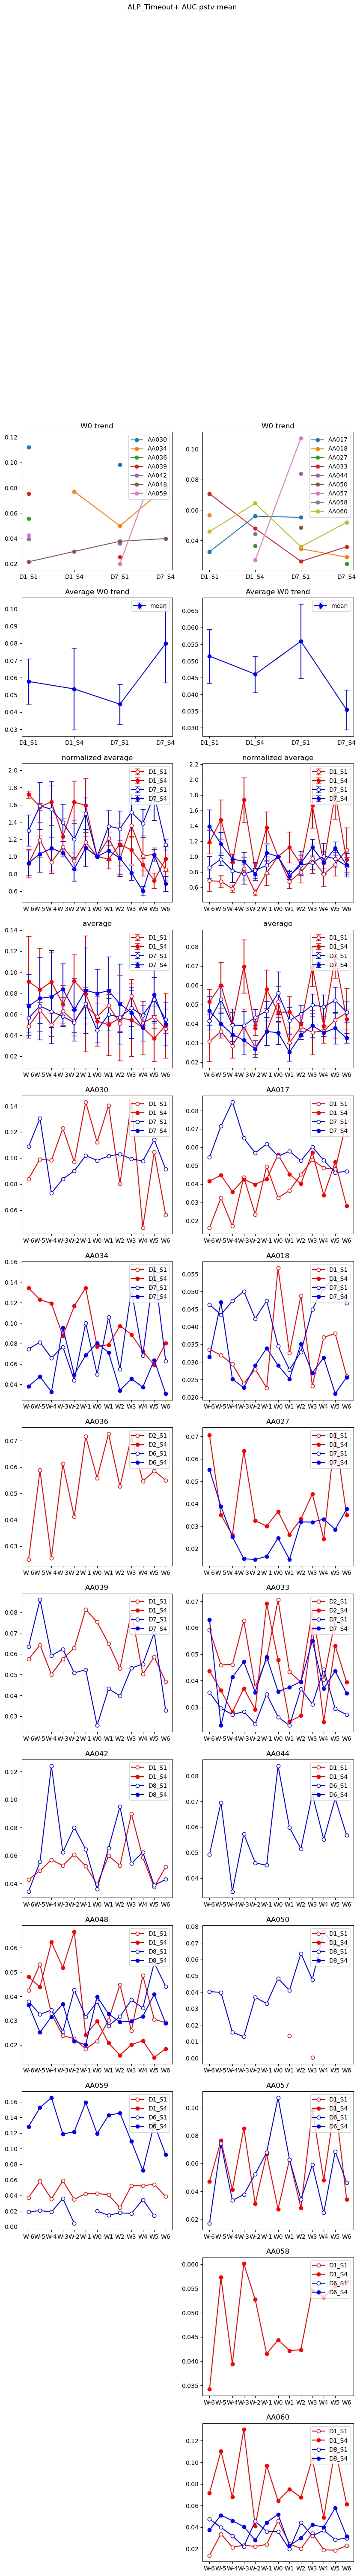

In [99]:
plot_figures(saline, coke, "AUC", "mean")

                  AA030     AA034         AA036      AA039         AA042  \
D1_S1 W-6  5.146328e+00  2.514130  1.954173e+00   2.151862  7.346052e+00   
D1_S1 W-5  3.857271e+00  2.229342  1.515330e+00   1.807426  7.312656e+00   
D1_S1 W-4  2.584761e+00  1.832804  1.380860e+00   1.469413  6.163330e+00   
D1_S1 W-3  3.536143e+00  1.856434  1.852131e+00   0.845406  4.186922e+00   
D1_S1 W-2  1.976334e+00  1.341339  9.754985e-01   1.339529  2.769618e+00   
D1_S1 W-1  1.321445e+00  0.650696  8.094527e-01   1.195318  1.392671e+00   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00   1.000000  1.000000e+00   
D1_S1 W1   7.152375e-01  2.507108  8.942188e-01   1.049860  1.719572e+00   
D1_S1 W2   1.138377e+00  1.843556  1.015637e+00   1.483344  2.179331e+00   
D1_S1 W3   1.544409e+00  1.765720  1.358153e+00   2.330827  3.977602e+00   
D1_S1 W4   2.524790e+00  2.305747  1.899249e+00   1.320753  1.995792e+00   
D1_S1 W5   5.288554e+00  4.185204  1.730945e+00   1.874037  1.590158e+00   
D1_S1 W6   2

                  AA030     AA034         AA036     AA039         AA042  \
D1_S1 W-6  1.362069e+00  2.022019  2.196041e+00  4.140248  3.634788e+00   
D1_S1 W-5  1.354241e+00  1.893303  2.144447e+00  3.532079  2.967662e+00   
D1_S1 W-4  7.881854e-01  1.489940  1.997599e+00  1.852727  3.171624e+00   
D1_S1 W-3  6.725183e-01  1.636355  1.796605e+00  1.615761  1.909449e+00   
D1_S1 W-2  7.977946e-01  1.066338  1.289270e+00  1.701955  1.192286e+00   
D1_S1 W-1  9.684419e-01  1.118484  1.138536e+00  1.087617  6.663353e-01   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000e+00   
D1_S1 W1   1.485310e+00  1.059080  1.579468e+00  1.485929  9.643645e-01   
D1_S1 W2   1.634441e+00  2.379215  1.835498e+00  2.228005  1.489588e+00   
D1_S1 W3   1.483888e+00  1.278600  1.744569e+00  2.453877  1.770864e+00   
D1_S1 W4   1.237510e+00  1.526626  2.314773e+00  3.185334  2.904935e+00   
D1_S1 W5   2.429549e+00  3.166764  2.513511e+00  3.420324  2.765751e+00   
D1_S1 W6   2.907206e+00  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.999093  0.655425  1.777460  1.555473  0.931794  0.987330   
D1_S1 W-5  1.202163  0.825652  1.687530  1.280426  0.505228  0.854514   
D1_S1 W-4  1.113706  0.660051  1.629714  1.226978  1.009804  0.668861   
D1_S1 W-3  1.393912  0.867224  1.530917  1.259923  0.918163  0.602490   
D1_S1 W-2  1.057713  0.741326  1.213511  1.006702  0.850186  0.465088   
D1_S1 W-1  1.461429  0.807516  1.155979  0.872558  0.953732  0.735374   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.216163  0.663337  1.181275  1.341253  0.710626  0.684137   
D1_S1 W2   1.061239  1.012117  1.096517  1.123254  1.064049  0.734974   
D1_S1 W3   0.495909  0.645539  0.979297  0.839509  0.738991  0.957739   
D1_S1 W4   0.387252  0.605818  0.816968  1.063437  1.076176  0.850010   
D1_S1 W5   0.710159  1.343667  0.737039  1.188235  1.201416  1.413518   
D1_S1 W6   0.246339  0.732654  0.912920  1.064344  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.636331  1.158876  1.499352  1.727497  0.803544  1.970023   
D1_S1 W-5  1.107138  0.896166  1.179876  0.795885  0.400207  1.136076   
D1_S1 W-4  1.859403  0.536326  1.411582  1.209276  1.063923  0.723938   
D1_S1 W-3  2.755283  1.577208  1.255696  0.866910  0.441197  1.244765   
D1_S1 W-2  2.194714  1.326748  1.175076  0.945350  1.658391  1.725583   
D1_S1 W-1  2.006808  0.549831  1.013788  1.085403  1.359548  0.632609   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.120449  1.394406  0.777675  0.811193  1.726758  1.598587   
D1_S1 W2   1.362579  1.410229  1.034659  0.958468  1.878253  1.141352   
D1_S1 W3   0.960410  0.615533  0.950331  1.275461  1.877089  2.767542   
D1_S1 W4   1.186884  0.475976  0.857214  0.527616  0.675805  1.777906   
D1_S1 W5   1.543740  1.257130  0.888706  1.279551  2.153907  1.210383   
D1_S1 W6   2.262434  1.358272  0.664583  1.051758  

              AA030     AA034     AA036     AA039      AA042     AA048  \
D1_S1 W-6  5.797315  1.004665  1.614438  1.200319   0.590830  2.635824   
D1_S1 W-5  4.725279  1.526526  0.836347  0.830571   0.615154  2.107659   
D1_S1 W-4  3.274026  1.601514  1.331256  1.340376   0.926040  2.156468   
D1_S1 W-3  1.732911  0.617413  0.592394  1.080378   0.715532  3.452269   
D1_S1 W-2  3.373703  1.277716  1.137065  0.701323   0.695609  2.148236   
D1_S1 W-1  0.989651  0.944581  0.443022  0.549634   0.660096  1.719620   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
D1_S1 W1   1.160475  0.781558  0.470463  0.610309   0.884653  1.647544   
D1_S1 W2   2.876348  1.474214  0.846771  0.476533   0.934677  2.339827   
D1_S1 W3   2.839884  0.945526  0.662041  0.842680   1.124195  2.473396   
D1_S1 W4   3.009178  2.328393  0.726757  0.904174   0.515087  3.659035   
D1_S1 W5   3.778229  1.830603  0.888003  0.883142   1.075849  5.359362   
D1_S1 W6   6.521710  2.224034  0.88255

              AA030     AA034     AA036     AA039      AA042     AA048  \
D1_S1 W-6  1.940218  1.402041  2.096010  1.326912   0.846437  1.001283   
D1_S1 W-5  1.147164  0.703063  1.273252  0.611029   0.224412  0.882521   
D1_S1 W-4  3.094731  1.034406  1.568949  1.461391   0.646447  1.665321   
D1_S1 W-3  0.757403  0.601967  0.660656  0.681343   0.397580  0.863663   
D1_S1 W-2  1.865036  1.066277  1.289957  0.863720   0.813916  1.213234   
D1_S1 W-1  0.619172  0.614006  0.408381  0.742447   0.407365  0.788530   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
D1_S1 W1   1.192557  0.451854  0.699460  0.536219   0.715216  1.275875   
D1_S1 W2   1.665947  1.136791  1.488458  0.712267   1.131800  1.215164   
D1_S1 W3   1.860217  0.752663  0.985031  0.839116   0.882412  0.789896   
D1_S1 W4   3.179522  1.114956  1.029019  0.680092   1.200086  0.982909   
D1_S1 W5   2.630987  1.541183  1.302346  0.794356   1.297198  1.011426   
D1_S1 W6   3.203203  1.357930  1.53865

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.419604  1.084940  1.836111  0.962717  0.956489  0.524956   
D1_S1 W-5  2.462814  1.529741  0.924857  1.056730  0.949198  0.547432   
D1_S1 W-4  1.025289  1.304337  1.222038  0.984696  0.884368  0.956805   
D1_S1 W-3  1.121741  2.238239  0.968519  1.950167  2.547991  0.543276   
D1_S1 W-2  0.736108  1.071816  1.148486  1.058865  0.820856  0.910115   
D1_S1 W-1  1.522835  2.300665  1.459893  1.598838  0.687221  0.734814   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.850043  1.821928  1.379317  1.079990  0.905520  1.017608   
D1_S1 W2   1.259174  0.825375  0.901145  0.879436  0.625223  0.725920   
D1_S1 W3   1.476758  1.305827  1.828163  1.153735  0.935927  0.653474   
D1_S1 W4   1.523512  0.927455  0.833744  0.812211  0.499647  0.539291   
D1_S1 W5   1.478869  2.091281  2.073657  1.574497  1.441944  0.848706   
D1_S1 W6   1.036734  0.561184  0.964250  1.037464  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.796971  0.871849  2.241605  0.808958  0.407725  1.506636   
D1_S1 W-5  0.997805  2.098386  0.703577  1.125090  1.102991  1.238808   
D1_S1 W-4  0.835501  2.391753  1.510029  0.741686  1.245615  1.031796   
D1_S1 W-3  1.029811  2.246182  0.825594  0.752123  0.953635  2.689793   
D1_S1 W-2  0.653448  1.757057  1.376486  0.896704  0.888122  1.611428   
D1_S1 W-1  1.403185  2.443371  1.211502  1.163037  0.916755  1.259508   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   2.100826  1.460568  0.870785  1.096620  1.258924  1.569837   
D1_S1 W2   0.824589  1.474954  1.526409  0.743458  1.467363  1.750428   
D1_S1 W3   1.742434  1.999789  1.189023  1.255654  0.773518  1.141139   
D1_S1 W4   1.201043  3.563227  0.808484  1.445439  0.243628  1.533713   
D1_S1 W5   1.529279  2.347986  1.807596  1.060776  1.604823  3.312064   
D1_S1 W6   1.522308  0.664603  1.034805  0.995818  

              AA030     AA034     AA036     AA039      AA042     AA048  \
D1_S1 W-6  2.793502  0.974710  2.409696  2.434594   2.643756  1.146183   
D1_S1 W-5  1.245119  1.230744  0.880668  1.146829   4.124440  1.393546   
D1_S1 W-4  1.157083  1.086234  1.946897  1.606858   1.075765  1.428148   
D1_S1 W-3  1.698223  0.727004  1.343563  0.955633   2.963221  1.288032   
D1_S1 W-2  0.622262  1.317673  1.496958  1.322257   1.355743  1.091063   
D1_S1 W-1  0.798347  0.279762  0.713280  0.803663   1.337542  0.775235   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
D1_S1 W1   0.515719  0.737077  0.558060  0.796221   1.288761  1.029448   
D1_S1 W2   1.207303  1.275538  0.755619  0.953958   1.281777  0.623104   
D1_S1 W3   0.907955  0.532542  1.281375  1.174418   3.365000  2.529134   
D1_S1 W4   0.994194  0.786172  1.040477  0.728490   2.114234  1.337974   
D1_S1 W5   2.215786  1.629492  1.586865  1.203022   2.113293  1.693085   
D1_S1 W6   1.529148  0.711300  1.34545

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.555198  1.415740  1.165825  2.190353  1.457310  1.014804   
D1_S1 W-5  0.908970  1.648096  0.946671  0.859215  1.080831  1.058854   
D1_S1 W-4  0.837908  1.448982  1.263983  1.189473  0.943050  0.701169   
D1_S1 W-3  0.889606  0.644886  0.953705  0.409292  0.785229  1.195034   
D1_S1 W-2  0.390998  0.888940  1.272963  0.824131  0.804262  0.643257   
D1_S1 W-1  0.560384  0.635577  0.512625  0.195921  0.443178  0.382273   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.951445  0.578074  0.548286  0.565038  0.408617  0.376847   
D1_S1 W2   0.860495  1.315913  0.744065  1.087220  1.324454  0.907194   
D1_S1 W3   0.781504  0.816702  0.776531  0.837312  0.680181  0.536484   
D1_S1 W4   1.350317  0.903618  0.770091  1.145630  1.738039  0.642459   
D1_S1 W5   1.347249  1.486536  1.007539  0.730259  1.268444  1.328756   
D1_S1 W6   1.995442  0.837676  1.267909  0.792114  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.722143  1.260183  0.574633  0.711152  1.937277  1.007732   
D1_S1 W-5  0.615276  1.392372  0.894359  1.090734  1.643856  0.978085   
D1_S1 W-4  0.654792  1.001405  0.572273  1.144767  1.151241  0.586182   
D1_S1 W-3  0.942020  0.837818  1.214167  1.264187  1.519221  1.070666   
D1_S1 W-2  0.500505  1.296927  0.563362  0.911062  1.054551  0.599142   
D1_S1 W-1  0.862513  1.222427  1.356562  1.376079  0.787305  0.864492   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.967974  1.073021  1.306658  1.596223       NaN  0.476746   
D1_S1 W2   0.751699  0.899952  0.858135  1.150573  1.051105  1.068964   
D1_S1 W3   0.674493  1.385565  1.164826  1.338817  0.034212  0.588548   
D1_S1 W4   0.525243  0.764137  0.799443  0.948555  1.582633  0.980933   
D1_S1 W5   0.776229  1.272788  1.164245  1.243182  1.522984  1.288545   
D1_S1 W6   0.791113  1.065972  0.639464  0.954486  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.974373  0.723948  0.656733  0.599348  1.079102  1.557444   
D1_S1 W-5  1.044605  0.835123  1.128768  0.703934  1.452253  1.580674   
D1_S1 W-4  0.665331  0.995666  0.517362  0.592110  0.924444  1.137330   
D1_S1 W-3  1.418089  0.819930  1.125575  1.215348  1.292732  1.238146   
D1_S1 W-2  1.218782  1.334830  0.821846  0.838579  1.541354  0.965146   
D1_S1 W-1  1.254823  0.869332  0.902217  1.661753  1.303872  1.095314   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.397865  1.015054  1.265639  1.328833  1.175650  1.359725   
D1_S1 W2   1.065186  1.213105  0.981650  0.853863  1.452502  0.994628   
D1_S1 W3   1.742113  0.810340  1.214928  1.636248  1.912920  2.194704   
D1_S1 W4   0.774551  0.630766  1.117474  0.593376  1.131642  1.607048   
D1_S1 W5   1.098221  1.183254  1.171349  1.438186  1.649270  0.763960   
D1_S1 W6   0.763298  1.212424  0.805545  0.674918  

               AA030     AA034     AA036     AA039      AA042     AA048  \
D1_S1 W-6   2.660920  0.963284  2.952735  1.738628   0.374549  1.347870   
D1_S1 W-5   1.223328  0.967353  1.613812  0.983194   1.081719  1.370679   
D1_S1 W-4   1.032158  0.966003  2.405401  1.472860   1.169290  1.668012   
D1_S1 W-3   0.971587  0.975627  1.700444  0.866350   0.970559  0.965868   
D1_S1 W-2   0.783794  0.971206  1.207086  1.141192   1.386560  0.671771   
D1_S1 W-1   0.712440  0.997851  0.805779  0.709791   0.902354  0.431735   
D1_S1 W0    1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
D1_S1 W1    0.742311  1.205590  0.808984  0.491452   0.933241  0.541172   
D1_S1 W2    1.109438  1.314918  0.982796  1.149915   1.121614  1.085960   
D1_S1 W3    1.191169  1.197950  1.488171  0.831397   2.118862  1.542179   
D1_S1 W4    0.996863  1.180501  1.415615  1.038353   2.063667  1.829918   
D1_S1 W5    1.738288  1.645000  1.534442  0.876506   0.289082  1.688536   
D1_S1 W6    1.602994  1.7

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.735483  1.002040  1.875689  2.032986  1.438089  1.009379   
D1_S1 W-5  0.902465  0.998679  1.305741  0.852512  0.796053  1.067571   
D1_S1 W-4  1.277973  1.008507  1.790661  1.056919  1.223224  0.873932   
D1_S1 W-3  0.845656  1.015708  1.154061  0.661264  0.576563  1.153997   
D1_S1 W-2  0.553630  1.013589  1.124467  0.904984  1.023720  0.603152   
D1_S1 W-1  0.555371  0.999478  0.621486  0.100283  0.306126  0.867422   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.842148  1.077314  0.719297  0.668121  0.536706  0.586799   
D1_S1 W2   1.595602  1.251757  1.027787  1.011738  1.600248  0.476194   
D1_S1 W3   1.203217  1.235846  0.997424  0.692855  0.453983  0.872688   
D1_S1 W4   3.355667  1.343221  1.178144  1.076650  1.954086  0.854484   
D1_S1 W5   2.029768  1.326561  1.355109  0.717884  1.523139  1.575939   
D1_S1 W6   4.009852  1.403902  1.262083  0.821518  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.196008       NaN  0.668573  0.875480  2.412629  1.052851   
D1_S1 W-5  0.833714       NaN  0.830539  1.202264  3.778777  1.061675   
D1_S1 W-4  0.761506       NaN  0.580634  1.342382  2.941924  1.049141   
D1_S1 W-3  0.974256       NaN  1.377684  1.497259       NaN  0.868200   
D1_S1 W-2  0.804947       NaN  0.802619  1.053535  3.077493  1.021362   
D1_S1 W-1  1.035619       NaN  1.791558  1.594816       NaN  0.927117   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.916330       NaN  1.407785  1.908408  1.801994  0.787532   
D1_S1 W2   0.796648       NaN  0.917238  1.393252  0.906162  1.206911   
D1_S1 W3   0.828860       NaN  1.413188  1.756428  2.556262  0.925820   
D1_S1 W4   0.986761       NaN  0.841701  1.214353  1.912589  0.919082   
D1_S1 W5   0.785300       NaN  1.269145  1.524293  0.875019  1.183295   
D1_S1 W6   1.105179       NaN  0.990815  0.883291  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.793555       NaN  0.466979  0.817796  0.717758  1.841132   
D1_S1 W-5  1.119449       NaN  0.998509  0.917623  1.069513  1.559895   
D1_S1 W-4  0.852131       NaN  0.459756  0.651181  1.622887  1.279477   
D1_S1 W-3  1.120712       NaN  0.961098  1.160582  1.107651  1.195321   
D1_S1 W-2  0.805008       NaN  0.828667  1.122205  1.518138  0.997468   
D1_S1 W-1  1.220012       NaN  1.118027  1.567077  1.305430  0.845032   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.507001       NaN  1.225163  1.162689  1.300226  1.286016   
D1_S1 W2   0.969291       NaN  0.924475  0.804415  1.412674  1.674326   
D1_S1 W3   1.284881       NaN  1.335868  1.369622  1.724068  0.968286   
D1_S1 W4   0.607051       NaN  0.993757  0.677562  1.268457  2.141649   
D1_S1 W5   0.887290       NaN  0.980442  1.040242  1.137857  1.540787   
D1_S1 W6   0.602399       NaN  1.073431  0.677724  

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

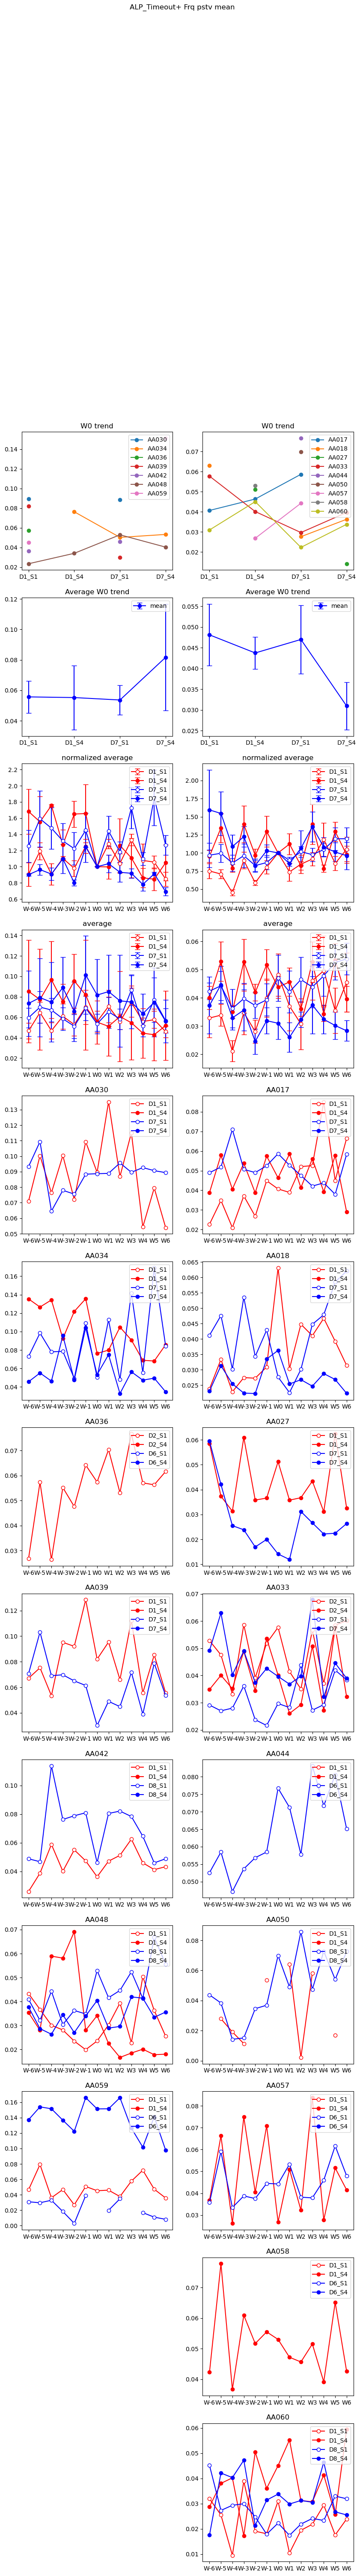

In [100]:
plot_figures(saline, coke, "Frq", "mean")

                  AA030     AA034         AA036     AA039         AA042  \
D1_S1 W-6  2.817301e+00  3.020952  2.061309e+00  1.719357  5.010189e+00   
D1_S1 W-5  2.083721e+00  2.779175  1.662268e+00  1.520543  3.805734e+00   
D1_S1 W-4  1.122169e+00  2.838809  1.442388e+00  0.932685  4.001007e+00   
D1_S1 W-3  7.434245e-01  2.174098  1.869732e+00  1.179951  2.920645e+00   
D1_S1 W-2  5.631743e-01  1.770671  1.150246e+00  0.776829  2.300146e+00   
D1_S1 W-1  5.831658e-01  2.457524  9.400178e-01  0.590583  6.651819e-01   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000e+00   
D1_S1 W1   4.983558e-01  1.948863  1.017737e+00  1.227839  8.389102e-01   
D1_S1 W2   4.375982e-01  1.648355  1.013094e+00  0.859794  2.060645e+00   
D1_S1 W3   4.537145e-01  2.605696  1.346583e+00  1.301315  1.986346e+00   
D1_S1 W4   6.472053e-01  2.520330  1.581112e+00  0.966101  1.727844e+00   
D1_S1 W5   1.371260e+00  3.958739  1.816905e+00  1.673476  1.012675e+00   
D1_S1 W6   9.078467e-01  

                  AA030     AA034         AA036     AA039         AA042  \
D1_S1 W-6  1.842629e+00  2.527493  2.084781e+00  2.248269  3.904023e+00   
D1_S1 W-5  2.461867e+00  2.789480  2.042683e+00  2.230462  2.436753e+00   
D1_S1 W-4  1.271558e+00  2.396197  1.246311e+00  1.949748  3.992422e+00   
D1_S1 W-3  1.117673e+00  1.622265  1.410501e+00  1.785928  2.482873e+00   
D1_S1 W-2  6.902987e-01  1.123757  1.108523e+00  1.035682  1.947888e+00   
D1_S1 W-1  6.088463e-01  1.421728  9.757072e-01  1.159493  1.185735e+00   
D1_S1 W0   1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000e+00   
D1_S1 W1   1.444446e+00  1.212793  1.342842e+00  1.372150  1.171278e+00   
D1_S1 W2   1.681005e+00  1.936386  1.568392e+00  1.402941  2.458222e+00   
D1_S1 W3   1.714449e+00  2.054128  1.932045e+00  1.608848  1.855979e+00   
D1_S1 W4   1.642192e+00  2.354092  2.183575e+00  2.428286  2.744856e+00   
D1_S1 W5   1.899316e+00  4.013438  2.308028e+00  2.257650  3.163457e+00   
D1_S1 W6   2.385908e+00  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.786778  1.023176  1.572916  1.050137  1.177890  0.987492   
D1_S1 W-5  0.888052  1.184815  1.389044  0.684439  0.767648  0.695651   
D1_S1 W-4  1.294567  1.098205  1.511691  0.941117  1.224098  0.730599   
D1_S1 W-3  1.215218  1.063912  1.538505  0.972807  1.029113  0.486365   
D1_S1 W-2  1.083028  0.864342  1.307681  0.844987  1.264118  0.488294   
D1_S1 W-1  0.955320  1.090643  0.884957  0.938258  1.231194  0.956330   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.070657  0.762667  1.034453  1.119216  1.001764  0.471905   
D1_S1 W2   1.135274  0.839838  1.021605  1.065780  1.368214  0.629909   
D1_S1 W3   0.820967  0.933406  0.808795  0.944100  0.799827  0.606118   
D1_S1 W4   0.551407  0.805617  0.752016  1.064311  0.893547  0.756555   
D1_S1 W5   1.114613  1.838049  0.704322  0.949974  1.209557  1.011860   
D1_S1 W6   0.908834  0.950705  0.839303  0.995368  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.851980  1.140791  1.202486  0.469687  2.043374  1.430617   
D1_S1 W-5  1.812454  1.079038  1.266084  0.968535  1.578447  0.634715   
D1_S1 W-4  0.669329  1.400835  1.154479  0.835166  0.574100  1.744962   
D1_S1 W-3  0.904492  1.525771  1.337810  1.295387  1.997409  1.212410   
D1_S1 W-2  0.540617  1.064287  1.086663  0.895349  1.104574  0.980271   
D1_S1 W-1  0.866861  1.981589  0.863855  0.830647  0.953491  1.110126   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.592780  1.554369  0.987001  1.142277  0.800947  1.067387   
D1_S1 W2   0.695383  1.114776  0.925217  0.749925  2.032388  0.960187   
D1_S1 W3   0.463013  1.242443  0.671575  0.740912  1.120104  2.664079   
D1_S1 W4   0.428474  0.735933  0.603403  0.433090  0.958214  1.082905   
D1_S1 W5   0.534022  1.421667  0.795847  1.014667  2.312975  1.334047   
D1_S1 W6   1.554120  1.588970  0.878448  0.971675  

               AA030     AA034      AA036     AA039     AA042     AA048  \
D1_S1 W-6   3.786457  1.317873   1.848085  0.600440  0.634251  1.190427   
D1_S1 W-5   3.057646  0.704798   0.992472  0.571549  0.315410  1.089468   
D1_S1 W-4   2.181791  1.281946   1.567950  1.323602  0.685311  0.640057   
D1_S1 W-3   0.944042  0.516835   0.647954  0.537574  0.345812  1.608450   
D1_S1 W-2   1.032403  1.002111   1.264318  0.557211  0.484305  0.824467   
D1_S1 W-1   0.606938  0.605537   0.436234  0.429520  0.446079  0.713059   
D1_S1 W0    1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
D1_S1 W1    0.506505  0.544018   0.540046  0.665217  0.797962  0.808097   
D1_S1 W2    1.909877  1.237225   1.103332  0.299099  0.940750  1.005774   
D1_S1 W3    1.065974  1.118790   0.686567  0.489615  0.783136  0.903193   
D1_S1 W4    1.376423  1.525491   0.771695  0.762198  0.695536  1.335907   
D1_S1 W5    1.993835  1.068969   0.768296  0.497781  0.777292  1.153165   
D1_S1 W6    3.360913  1.3

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.219747  1.337427  1.534470  2.193277  0.976112  1.553928   
D1_S1 W-5  0.809896  0.642081  0.922952  0.973687  0.617177  1.266335   
D1_S1 W-4  1.288119  1.328450  1.238038  1.312015  0.670502  1.646220   
D1_S1 W-3  1.037506  0.419506  0.549957  1.086217  0.322521  1.062108   
D1_S1 W-2  1.746998  0.762982  1.047986  1.128062  0.640407  0.892976   
D1_S1 W-1  0.616440  0.420532  0.312944  0.586328  0.684873  1.070287   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.117910  0.414927  0.548403  0.928821  0.756397  1.026463   
D1_S1 W2   1.531644  1.278190  1.005853  1.021897  0.964413  1.058873   
D1_S1 W3   1.891944  0.728555  0.783791  0.950758  1.006022  1.013266   
D1_S1 W4   3.033284  1.314449  0.979751  1.439315  1.098180  1.390082   
D1_S1 W5   2.358730  0.816118  1.039210  0.848145  1.408522  1.554830   
D1_S1 W6   2.677208  1.222394  1.099976  1.296277  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.851679  1.243871  1.946973  0.769376  0.925731  0.924786   
D1_S1 W-5  0.985592  2.174792  1.022178  1.053732  1.063310  0.880269   
D1_S1 W-4  0.766565  1.226776  1.501239  0.960252  0.775914  1.016893   
D1_S1 W-3  0.791862  1.859864  1.237593  0.944017  1.312083  0.794246   
D1_S1 W-2  0.712604  0.885647  1.194767  0.825452  0.625765  0.844256   
D1_S1 W-1  1.758067  2.095728  1.541276  0.781572  1.322483  0.895516   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   2.115790  1.927520  1.431591  1.865843  1.354797  0.585077   
D1_S1 W2   1.297067  0.876456  0.896232  0.983427  0.430844  0.913100   
D1_S1 W3   2.029371  2.017613  1.828740  0.979417  1.304350  1.049411   
D1_S1 W4   1.420093  1.329351  1.086469  0.860966  0.535140  0.647013   
D1_S1 W5   1.762714  2.543448  2.457934  0.925686  0.960270  1.048323   
D1_S1 W6   1.117671  0.775768  0.981574  0.879982  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.704556  1.590434  2.094749  0.606253  0.176797  0.677302   
D1_S1 W-5  1.005969  1.726699  0.824010  0.449527  0.959414  0.649905   
D1_S1 W-4  0.783187  1.290015  1.730280  0.713103  0.962326  0.447882   
D1_S1 W-3  0.530598  1.597686  0.945271  0.548640  0.920285  1.207173   
D1_S1 W-2  0.235583  1.067978  1.358898  0.304693  0.602707  0.684027   
D1_S1 W-1  1.236139  1.269259  1.122227  0.869311  0.925128  0.685535   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.138996  1.664377  1.295091  0.726280  1.118651  0.691756   
D1_S1 W2   0.697057  1.488406  1.552068  0.734639  0.927637  0.799068   
D1_S1 W3   1.217496  1.524794  1.245434  0.925668  0.804523  0.848508   
D1_S1 W4   0.910356  1.281989  0.960178  1.055720  0.305066  0.748345   
D1_S1 W5   1.523437  1.882500  1.651569  0.527797  1.144247  0.647235   
D1_S1 W6   0.997129  0.707623  1.165376  0.519685  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.446036  1.009684  2.330447  1.225186  1.531409  1.003443   
D1_S1 W-5  1.400430  0.924519  1.116288  1.079060  1.773571  1.005325   
D1_S1 W-4  0.737099  1.314053  1.709712  1.234108  1.265902  1.164122   
D1_S1 W-3  0.885181  0.754414  1.273574  1.121541  2.211627  0.855435   
D1_S1 W-2  0.285953  1.057867  1.501178  1.020068  1.024431  0.882332   
D1_S1 W-1  0.571786  0.810529  0.979195  0.709095  0.632761  0.859433   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.465265  0.530586  0.599170  0.736220  0.983745  0.576010   
D1_S1 W2   0.480036  1.115711  0.849049  0.640216  1.892435  0.562230   
D1_S1 W3   0.461269  0.907901  1.250084  0.912210  2.046940  2.165264   
D1_S1 W4   1.002045  1.009812  0.895721  0.720992  2.189564  1.100602   
D1_S1 W5   0.740548  1.461003  1.283775  0.920895  0.709450  1.367241   
D1_S1 W6   0.916830  0.907505  1.065674  0.673083  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.401012  1.098663  1.385113  1.365939  0.799072  0.523491   
D1_S1 W-5  1.155135  1.233174  0.850582  0.495520  0.905022  0.597294   
D1_S1 W-4  1.012104  1.245628  1.392707  0.840430  1.404571  0.509202   
D1_S1 W-3  1.073259  0.706522  0.695801  0.436145  0.817888  0.449385   
D1_S1 W-2  0.943870  1.005544  1.440064  0.730194  1.075699  0.509573   
D1_S1 W-1  0.621304  0.567932  0.501340  0.338038  0.515853  0.448151   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.980437  0.546742  0.385928  0.328522  0.382255  0.350484   
D1_S1 W2   0.976656  0.905295  0.669548  0.787091  1.353471  0.548271   
D1_S1 W3   1.234079  0.772830  0.904761  0.606838  0.590145  0.633593   
D1_S1 W4   1.522781  0.778104  1.060199  0.942156  1.300542  0.457241   
D1_S1 W5   1.434595  1.278980  1.046264  0.734460  0.955093  0.611335   
D1_S1 W6   2.521886  0.832493  1.223719  1.004728  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.016493  1.269336  0.728881  0.819706  1.449658  0.564314   
D1_S1 W-5  0.522535  1.286784  1.052449  1.071599  1.666837  0.567126   
D1_S1 W-4  0.496497  0.950005  0.505832  0.803119  1.056090  0.424699   
D1_S1 W-3  1.089195  1.350499  1.691338  1.451750  1.823528  0.330033   
D1_S1 W-2  0.699801  1.251167  0.703080  1.006178  1.248218  0.514748   
D1_S1 W-1  0.876246  1.498643  1.259992  1.686373  1.964841  0.636667   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.031445  1.246444  1.508955  2.093463  1.318981  0.251542   
D1_S1 W2   0.867023  0.986736  1.027855  1.018991  0.838511  0.633979   
D1_S1 W3   0.957821  1.801537  1.301261  1.891237  1.395724  0.430519   
D1_S1 W4   0.789957  1.068815  0.945216  0.986889  1.003209  0.403525   
D1_S1 W5   0.692007  1.402337  1.245368  1.424931  2.400688  0.795372   
D1_S1 W6   1.137415  1.278097  0.850907  0.880590  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.847239  0.865700  0.613457  0.458755  0.887823  0.793524   
D1_S1 W-5  0.742687  0.977599  1.051192  0.709852  1.678201  0.851517   
D1_S1 W-4  0.586220  0.779131  0.484236  0.339363  1.452391  0.805415   
D1_S1 W-3  0.839862  1.100695  1.244148  0.944442  1.753101  0.614958   
D1_S1 W-2  0.570735  1.575842  0.585479  0.587710  1.239992  0.829234   
D1_S1 W-1  0.752380  1.820091  0.960926  0.888930  0.885230  0.826186   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.994888  1.040493  1.263941  0.731447  1.325403  0.783712   
D1_S1 W2   0.687286  0.907599  1.194908  0.593164  0.769584  0.650072   
D1_S1 W3   1.056180  1.274381  1.163744  0.899597  1.620320  1.315727   
D1_S1 W4   0.608822  0.786573  0.996025  0.484553  0.811839  0.946722   
D1_S1 W5   0.671919  0.992055  1.175341  0.940752  1.202883  1.054629   
D1_S1 W6   0.625877  1.373323  0.899411  0.676149  

               AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6   4.656656  0.957553  2.438453  1.467570  0.954166  1.209400   
D1_S1 W-5   2.245118  0.958810  1.383111  1.449097  0.917919  1.314508   
D1_S1 W-4   1.348213  0.962705  2.221301  1.634117  1.246098  1.695010   
D1_S1 W-3   1.550670  0.942873  1.645045  0.886166  0.913148  1.132037   
D1_S1 W-2   0.855237  0.967259  1.215351  1.377745  1.299755  0.705370   
D1_S1 W-1   0.987316  0.999625  0.517187  0.967043  0.600729  0.587585   
D1_S1 W0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1    0.694854  0.974120  0.628684  0.633636  0.888132  0.584788   
D1_S1 W2    0.907758  1.144621  0.808526  1.635607  1.310101  1.532849   
D1_S1 W3    1.066935  1.280558  1.315438  1.706698  1.514063  1.314264   
D1_S1 W4    1.394709  1.523105  1.006092  1.451615  2.030849  1.382839   
D1_S1 W5    1.703610  1.345259  1.319089  0.884653  1.186761  1.471274   
D1_S1 W6    2.111351  1.330731  1.5251

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.714823  1.017024  2.126574  1.093995  0.896917  0.786264   
D1_S1 W-5  1.566040  1.020096  1.182900  0.346440  0.713370  1.014509   
D1_S1 W-4  1.159957  1.020046  1.980507  0.778585  1.283559  0.502389   
D1_S1 W-3  0.864577  1.039120  0.997390  0.492041  0.380660  0.759338   
D1_S1 W-2  1.596749  1.022455  1.481145  0.486536  1.027514  0.584796   
D1_S1 W-1  0.582656  1.011059  0.654241  0.256089  0.331926  0.628361   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.109464  1.092105  0.636539  0.209667  0.981255  0.404505   
D1_S1 W2   1.539711  1.256115  0.975979  0.619962  1.362298  0.964258   
D1_S1 W3   1.391641  1.275598  1.191420  0.455282  0.588981  0.533809   
D1_S1 W4   2.606291  1.087520  1.285395  0.843894  1.784301  1.047542   
D1_S1 W5   1.867004  1.312482  1.295549  0.585830  1.392537  0.967934   
D1_S1 W6   3.212330  1.183330  1.573438  0.653137  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.304686       NaN  0.634949  1.024127  1.217772  0.752579   
D1_S1 W-5  0.571245       NaN  1.015833  1.185802  1.479500  0.773631   
D1_S1 W-4  0.742155       NaN  0.591203  1.400789  1.541576  0.336210   
D1_S1 W-3  1.115698       NaN  1.547435  2.040243  1.471185  0.685235   
D1_S1 W-2  0.899920       NaN  0.834351  1.282266  1.485814  0.685827   
D1_S1 W-1  1.178571       NaN  1.615502  1.972101  1.555031  0.740430   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.135043       NaN  1.473545  1.788456  1.782562  0.470260   
D1_S1 W2   0.803547       NaN  1.139406  1.094305  1.072225  0.735014   
D1_S1 W3   0.980907       NaN  1.255115  2.261910  1.538038  0.534916   
D1_S1 W4   0.674998       NaN  1.054192  0.853566  0.780254  0.470273   
D1_S1 W5   0.895817       NaN  1.274940  1.600292  1.365151  1.016619   
D1_S1 W6   1.178045       NaN  0.963057  0.888968  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.611724       NaN  0.532255  0.600602  0.668200  0.914665   
D1_S1 W-5  1.016317       NaN  0.866055  1.310544  1.186225  0.955784   
D1_S1 W-4  0.776182       NaN  0.479526  0.499815  0.855129  1.101322   
D1_S1 W-3  0.982185       NaN  1.112879  0.904266  1.182743  1.101794   
D1_S1 W-2  0.772327       NaN  0.668051  0.808150  0.890162  0.982163   
D1_S1 W-1  1.082280       NaN  1.061930  1.075297  1.048846  0.956418   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.108407       NaN  1.195063  1.003616  1.264783  0.904760   
D1_S1 W2   0.905441       NaN  0.928688  0.731987  0.706222  0.818731   
D1_S1 W3   0.982474       NaN  1.351917  0.955349  1.386305  1.335919   
D1_S1 W4   0.886052       NaN  0.819186  0.664137  0.808721  1.015088   
D1_S1 W5   0.598999       NaN  1.127983  0.902353  0.996668  1.432634   
D1_S1 W6   0.460059       NaN  0.959161  0.737946  

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

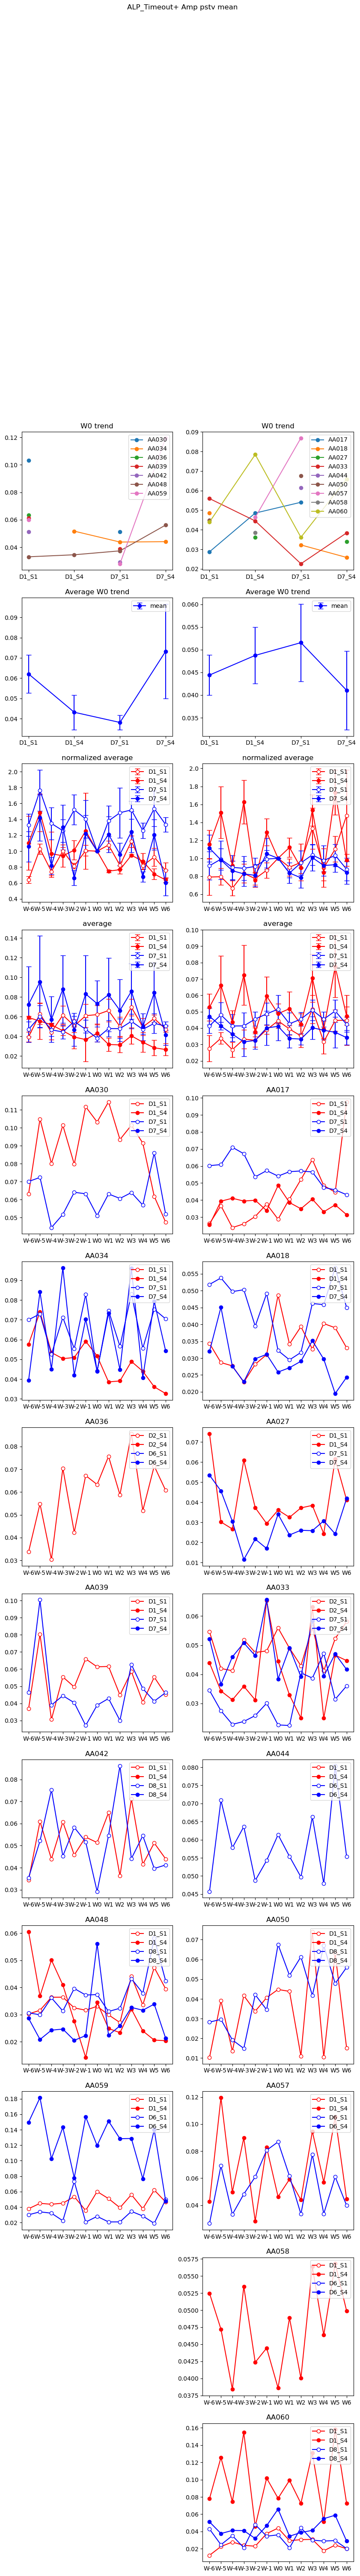

In [101]:
plot_figures(saline, coke, "Amp", "mean")

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  4.666667  1.133333  1.894737  1.166667  0.800000  2.833333   
D1_S1 W-5  3.666667  1.000000  1.947368  1.166667  1.000000  3.666667   
D1_S1 W-4  3.000000  1.266667  2.105263  1.500000  0.800000  3.666667   
D1_S1 W-3  1.333333  2.666667  1.894737  0.666667  1.200000  3.833333   
D1_S1 W-2  1.666667  3.133333  1.157895  1.333333  1.400000  3.000000   
D1_S1 W-1  4.666667  2.266667  1.210526  1.333333  1.200000  1.833333   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.333333  1.800000  1.105263  1.166667  0.800000  2.500000   
D1_S1 W2   1.333333  1.533333  1.473684  1.166667  1.200000  4.500000   
D1_S1 W3   1.666667  1.133333  1.421053  1.333333  1.600000  5.666667   
D1_S1 W4   1.333333  1.466667  1.210526  1.000000  0.600000  4.333333   
D1_S1 W5   1.000000  1.533333  1.157895  1.166667  0.600000  2.500000   
D1_S1 W6   3.666667  2.133333  1.210526  1.166667  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.285714  0.960784  0.613636  0.916667  1.166667  0.694444   1.25   
D1_S1 W-5  0.428571  1.000000  0.590909  0.916667  1.000000  0.555556   1.25   
D1_S1 W-4  0.571429  0.941176  0.522727  0.750000  1.166667  0.583333   0.75   
D1_S1 W-3  0.928571  0.509804  0.613636  1.083333  0.833333  0.527778   2.00   
D1_S1 W-2  0.857143  0.392157  0.931818  0.833333  0.833333  0.666667   2.00   
D1_S1 W-1  0.285714  0.627451  0.909091  0.833333  0.833333  0.861111   0.75   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   0.928571  0.784314  0.954545  0.916667  1.166667  0.750000   1.75   
D1_S1 W2   0.928571  0.843137  0.795455  0.916667  0.833333  0.416667   1.75   
D1_S1 W3   0.857143  0.960784  0.818182  0.833333  0.666667  0.222222   2.00   
D1_S1 W4   0.928571  0.862745  0.909091  1.000000  1.500000  0.444444   0.75   
D1_S1 W5   1.000000  0.843137  0.931818 

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.428571  0.901961  0.840909  1.000000  2.000000  0.555556   2.00   
D1_S1 W-5  0.928571  1.078431  0.863636  1.083333  1.666667  0.444444   2.00   
D1_S1 W-4  1.000000  0.784314  0.909091  1.083333  1.333333  0.472222   1.75   
D1_S1 W-3  1.000000  0.627451  0.840909  1.166667  1.500000  0.611111   1.75   
D1_S1 W-2  0.928571  0.411765  1.022727  0.916667  1.500000  0.194444   1.75   
D1_S1 W-1  0.357143  0.627451  1.113636  0.750000  1.166667  0.750000   1.00   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   0.928571  0.666667  0.931818  1.000000  1.166667  0.555556   1.50   
D1_S1 W2   1.000000  0.862745  0.818182  0.833333  0.833333  0.527778   2.00   
D1_S1 W3   0.928571  1.098039  0.727273  0.666667  0.666667  0.194444   2.25   
D1_S1 W4   0.428571  1.078431  0.909091  1.000000  1.000000  0.777778   0.75   
D1_S1 W5   0.857143  0.980392  0.863636 

              AA030     AA034     AA036     AA039  AA042     AA048     AA059  \
D1_S1 W-6  3.666667  1.400000  1.368421  1.000000    0.0  3.833333  0.333333   
D1_S1 W-5  1.666667  0.800000  1.315789  0.833333    0.4  4.333333  0.333333   
D1_S1 W-4  1.333333  1.800000  1.210526  0.833333    0.8  4.166667  0.500000   
D1_S1 W-3  1.000000  2.333333  1.368421  0.833333    0.6  3.333333  0.500000   
D1_S1 W-2  1.666667  3.066667  0.947368  1.166667    0.6  5.833333  0.500000   
D1_S1 W-1  4.000000  2.333333  0.736842  1.500000    1.0  2.500000  1.000000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000   
D1_S1 W1   1.666667  2.133333  1.157895  1.000000    1.0  3.833333  0.666667   
D1_S1 W2   1.000000  1.533333  1.421053  1.333333    1.2  3.833333  0.333333   
D1_S1 W3   1.666667  0.733333  1.631579  1.666667    1.6  5.833333  0.166667   
D1_S1 W4   3.666667  0.800000  1.210526  1.000000    1.0  2.333333  1.166667   
D1_S1 W5   1.666667  1.066667  1.315789 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.181818  1.000000  1.117647  1.000000  0.428571  2.222222   
D1_S1 W-5  1.272727  0.894737  0.941176  1.000000  1.428571  2.444444   
D1_S1 W-4  0.909091  1.157895  1.058824  1.285714  0.571429  0.777778   
D1_S1 W-3  0.909091  1.105263  0.852941  1.000000  1.142857  3.555556   
D1_S1 W-2  1.272727  2.105263  0.941176  0.571429  0.428571  1.777778   
D1_S1 W-1  0.272727  2.105263  0.647059  1.428571  1.000000  2.444444   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.181818  1.315789  1.029412  1.285714  0.714286  2.000000   
D1_S1 W2   0.363636  1.052632  1.117647  1.000000  0.571429  1.888889   
D1_S1 W3   0.181818  1.421053  0.882353  0.857143  0.857143  2.111111   
D1_S1 W4   1.181818  1.263158  1.117647  1.000000  0.571429  3.777778   
D1_S1 W5   0.363636  1.526316  0.852941  0.857143  1.000000  3.222222   
D1_S1 W6   0.363636  1.210526  1.058824  1.142857  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.833333  1.000000  0.862069  1.000000  1.800000  0.696970   
D1_S1 W-5  0.500000  1.020833  1.068966  1.000000  0.400000  0.606061   
D1_S1 W-4  1.166667  0.916667  0.931034  0.818182  1.400000  1.060606   
D1_S1 W-3  1.166667  0.958333  1.172414  1.000000  0.800000  0.333333   
D1_S1 W-2  0.500000  0.562500  1.068966  1.181818  1.800000  0.787879   
D1_S1 W-1  2.333333  0.541667  1.413793  0.727273  1.000000  0.606061   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   2.500000  0.854167  0.965517  0.818182  1.200000  0.727273   
D1_S1 W2   2.166667  0.979167  0.862069  1.000000  1.400000  0.757576   
D1_S1 W3   2.500000  0.833333  1.137931  1.090909  1.000000  0.696970   
D1_S1 W4   0.833333  0.875000  0.862069  1.000000  1.600000  0.242424   
D1_S1 W5   2.166667  0.791667  1.172414  1.090909  1.000000  0.393939   
D1_S1 W6   2.166667  0.895833  0.931034  0.909091  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.357143  1.275000  0.694444  0.909091  2.250000  0.343750   
D1_S1 W-5  0.142857  0.950000  0.888889  0.727273  0.750000  0.375000   
D1_S1 W-4  1.000000  1.200000  0.805556  1.090909  2.000000  1.031250   
D1_S1 W-3  0.928571  1.175000  1.000000  0.545455  0.250000  0.375000   
D1_S1 W-2  0.357143  0.675000  0.888889  1.090909  1.500000  0.656250   
D1_S1 W-1  1.000000  0.550000  1.166667  0.636364  1.000000  0.562500   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  0.550000  0.888889  0.636364  1.000000  0.687500   
D1_S1 W2   0.928571  1.175000  0.972222  0.818182  1.000000  1.031250   
D1_S1 W3   1.000000  0.425000  0.888889  0.545455  0.500000  0.906250   
D1_S1 W4   0.285714  1.150000  1.055556  0.727273  1.000000  0.437500   
D1_S1 W5   0.928571  0.975000  0.944444  0.818182  0.750000  0.593750   
D1_S1 W6   1.000000  0.800000  1.194444  0.727273  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.000000  0.555556  1.407407  1.142857  0.428571  2.818182   
D1_S1 W-5  3.750000  1.074074  1.148148  1.428571  1.285714  2.818182   
D1_S1 W-4  1.000000  0.703704  1.259259  0.857143  0.571429  0.818182   
D1_S1 W-3  1.250000  0.740741  1.000000  1.714286  1.571429  2.818182   
D1_S1 W-2  3.000000  1.481481  1.148148  0.857143  0.714286  2.000000   
D1_S1 W-1  1.000000  1.629630  0.777778  1.571429  1.000000  2.181818   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  1.666667  1.148148  1.571429  1.142857  1.909091   
D1_S1 W2   1.250000  0.740741  1.037037  1.285714  1.142857  0.818182   
D1_S1 W3   1.000000  1.814815  1.148148  1.714286  1.428571  1.181818   
D1_S1 W4   3.250000  0.777778  0.925926  1.428571  1.000000  2.545455   
D1_S1 W5   1.250000  1.037037  1.074074  1.285714  1.285714  2.090909   
D1_S1 W6   0.750000  1.296296  0.740741  1.428571  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  2.200000  1.600000  0.868421  1.285714  0.750000  2.500000   0.80   
D1_S1 W-5  2.200000  0.900000  0.842105  1.142857  1.000000  3.375000   1.00   
D1_S1 W-4  1.600000  1.850000  0.894737  1.571429  1.250000  2.875000   0.80   
D1_S1 W-3  0.800000  2.100000  1.000000  1.000000  1.500000  1.000000   0.80   
D1_S1 W-2  2.800000  2.050000  0.973684  1.285714  1.000000  2.125000   0.60   
D1_S1 W-1  2.800000  2.200000  0.605263  0.857143  1.500000  2.250000   1.40   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.200000  1.600000  0.710526  0.857143  1.500000  3.375000   0.80   
D1_S1 W2   0.800000  1.650000  0.973684  1.142857  1.750000  0.750000   0.60   
D1_S1 W3   0.800000  1.250000  0.657895  1.000000  1.750000  4.250000   0.80   
D1_S1 W4   1.200000  1.150000  0.789474  1.428571  1.250000  3.625000   0.80   
D1_S1 W5   0.800000  1.350000  0.578947 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.500000  0.723404  1.200000  0.818182  1.285714  0.676471   
D1_S1 W-5  0.500000  1.042553  1.240000  0.909091  1.000000  0.441176   
D1_S1 W-4  0.750000  0.638298  1.160000  0.636364  0.857143  0.558824   
D1_S1 W-3  1.083333  0.510638  1.000000  1.000000  0.714286  1.000000   
D1_S1 W-2  0.250000  0.531915  1.040000  0.818182  1.142857  0.735294   
D1_S1 W-1  0.333333  0.489362  1.600000  1.090909  0.714286  0.705882   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.916667  0.723404  1.440000  1.090909  0.714286  0.441176   
D1_S1 W2   1.083333  0.702128  1.040000  0.909091  0.714286  1.058824   
D1_S1 W3   1.083333  0.872340  1.520000  1.000000  0.714286  0.235294   
D1_S1 W4   0.916667  0.914894  1.320000  0.727273  0.857143  0.382353   
D1_S1 W5   1.083333  0.851064  1.640000  1.000000  1.428571  0.823529   
D1_S1 W6   0.583333  0.893617  1.120000  0.818182  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.285714  0.580000  0.650000  0.818182  1.500000  0.578947   
D1_S1 W-5  0.642857  1.040000  1.025000  0.636364  1.000000  0.421053   
D1_S1 W-4  0.785714  0.560000  0.950000  0.545455  1.250000  0.500000   
D1_S1 W-3  1.000000  0.460000  0.775000  0.636364  1.000000  0.894737   
D1_S1 W-2  0.857143  0.520000  0.975000  0.818182  1.500000  0.631579   
D1_S1 W-1  0.428571  0.580000  0.900000  0.818182  0.750000  0.605263   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  0.440000  1.000000  0.545455  0.250000  0.394737   
D1_S1 W2   1.000000  0.640000  1.000000  0.636364  0.250000  0.973684   
D1_S1 W3   1.000000  0.540000  0.950000  0.636364  0.500000  0.236842   
D1_S1 W4   0.714286  0.720000  0.950000  0.818182  0.500000  0.657895   
D1_S1 W5   0.857143  0.540000  0.900000  0.454545  1.250000  0.868421   
D1_S1 W6   0.357143  0.620000  1.075000  0.545455  

              AA030     AA034     AA036     AA039  AA042     AA048     AA059  \
D1_S1 W-6  3.250000  2.235294  1.608696  1.285714  0.625  4.000000  1.000000   
D1_S1 W-5  2.000000  0.823529  0.956522  1.571429  0.875  5.200000  1.200000   
D1_S1 W-4  1.500000  2.294118  1.086957  1.714286  0.750  4.600000  0.600000   
D1_S1 W-3  1.000000  2.529412  1.391304  1.571429  0.875  1.600000  0.600000   
D1_S1 W-2  1.250000  2.411765  1.043478  1.285714  0.625  3.600000  0.400000   
D1_S1 W-1  2.750000  2.235294  1.173913  1.285714  1.125  3.800000  1.200000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000  1.000000  1.000000   
D1_S1 W1   1.000000  2.647059  1.000000  1.714286  1.375  5.400000  1.200000   
D1_S1 W2   1.000000  2.058824  1.000000  1.571429  1.375  1.000000  1.200000   
D1_S1 W3   1.000000  2.352941  1.086957  1.571429  1.250  6.600000  1.000000   
D1_S1 W4   1.750000  1.823529  1.086957  1.285714  1.250  3.400000  1.000000   
D1_S1 W5   1.250000  2.352941  1.173913 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.000000  1.040000  0.916667  1.400000  1.333333  4.000000   
D1_S1 W-5  2.200000  1.040000  1.027778  1.400000  2.333333  4.333333   
D1_S1 W-4  1.000000  1.040000  0.972222  1.400000  1.333333  5.166667   
D1_S1 W-3  0.800000  1.000000  0.805556  1.400000  2.666667  2.000000   
D1_S1 W-2  2.600000  1.000000  1.000000  1.800000  1.000000  2.333333   
D1_S1 W-1  1.000000  1.000000  0.694444  2.000000  3.333333  0.666667   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.200000  0.920000  0.861111  1.800000  1.666667  3.666667   
D1_S1 W2   1.800000  0.920000  1.027778  2.000000  1.666667  5.000000   
D1_S1 W3   1.000000  0.920000  0.472222  1.000000  1.333333  3.500000   
D1_S1 W4   2.600000  0.920000  1.027778  2.000000  2.000000  5.833333   
D1_S1 W5   1.000000  1.120000  0.611111  1.400000  1.000000  2.333333   
D1_S1 W6   2.600000  1.040000  0.777778  1.600000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.583333  1.000000  1.111111  0.846154  0.777778  0.500000   
D1_S1 W-5  0.500000  1.000000  0.962963  0.846154  0.555556  0.444444   
D1_S1 W-4  1.000000  1.000000  1.037037  0.846154  0.888889  0.333333   
D1_S1 W-3  1.083333  1.000000  1.259259  0.846154  0.444444  0.861111   
D1_S1 W-2  0.416667  1.000000  1.000000  0.692308  1.000000  0.777778   
D1_S1 W-1  1.000000  1.000000  1.407407  0.615385  0.222222  1.055556   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.916667  1.048780  1.185185  0.692308  0.666667  0.583333   
D1_S1 W2   0.666667  1.048780  0.962963  0.615385  0.666667  0.361111   
D1_S1 W3   1.000000  1.048780  1.703704  1.000000  0.777778  0.611111   
D1_S1 W4   0.416667  1.048780  0.962963  0.615385  0.555556  0.194444   
D1_S1 W5   1.000000  0.951220  1.518519  0.846154  1.000000  0.805556   
D1_S1 W6   0.416667  1.000000  1.296296  0.769231  

              AA030     AA034     AA036  AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.285714       NaN  0.810811  0.900  2.000000  0.600000   1.25   
D1_S1 W-5  0.857143       NaN  1.000000  0.800  1.000000  0.514286   0.75   
D1_S1 W-4  0.928571       NaN  0.756757  0.600  2.000000  0.400000   1.00   
D1_S1 W-3  1.000000       NaN  0.918919  0.700  0.666667  0.914286   1.75   
D1_S1 W-2  0.857143       NaN  1.081081  0.800  1.666667  0.628571   1.00   
D1_S1 W-1  1.000000       NaN  1.027027  0.700  0.333333  0.885714   1.50   
D1_S1 W0   1.000000       NaN  1.000000  1.000  1.000000  1.000000   1.00   
D1_S1 W1   1.000000       NaN  1.027027  0.600  0.666667  0.542857   1.00   
D1_S1 W2   0.785714       NaN  1.000000  0.600  0.666667  0.457143   1.25   
D1_S1 W3   1.000000       NaN  1.000000  0.700  1.333333  0.628571   1.00   
D1_S1 W4   0.357143       NaN  1.027027  0.700  0.666667  0.628571   0.75   
D1_S1 W5   0.857143       NaN  1.054054  0.600  0.666667  0.942857   1.25   

              AA030     AA034     AA036  AA039     AA042     AA048  AA059  \
D1_S1 W-6  3.250000       NaN  1.269231  1.125  0.555556  3.142857    1.0   
D1_S1 W-5  1.250000       NaN  1.000000  1.250  1.000000  3.428571    1.4   
D1_S1 W-4  1.250000       NaN  1.346154  1.500  0.555556  4.000000    1.0   
D1_S1 W-3  1.000000       NaN  1.115385  1.375  1.111111  1.571429    0.6   
D1_S1 W-2  1.250000       NaN  0.884615  1.250  0.666667  2.857143    1.2   
D1_S1 W-1  1.000000       NaN  0.961538  1.375  1.222222  1.714286    0.8   
D1_S1 W0   1.000000       NaN  1.000000  1.000  1.000000  1.000000    1.0   
D1_S1 W1   1.000000       NaN  0.961538  1.500  1.111111  3.285714    1.2   
D1_S1 W2   1.500000       NaN  1.000000  1.500  1.111111  3.714286    1.0   
D1_S1 W3   1.000000       NaN  1.000000  1.375  0.888889  2.857143    1.2   
D1_S1 W4   3.000000       NaN  0.961538  1.375  1.111111  2.857143    1.4   
D1_S1 W5   1.250000       NaN  0.923077  1.500  1.111111  1.285714    1.0   

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

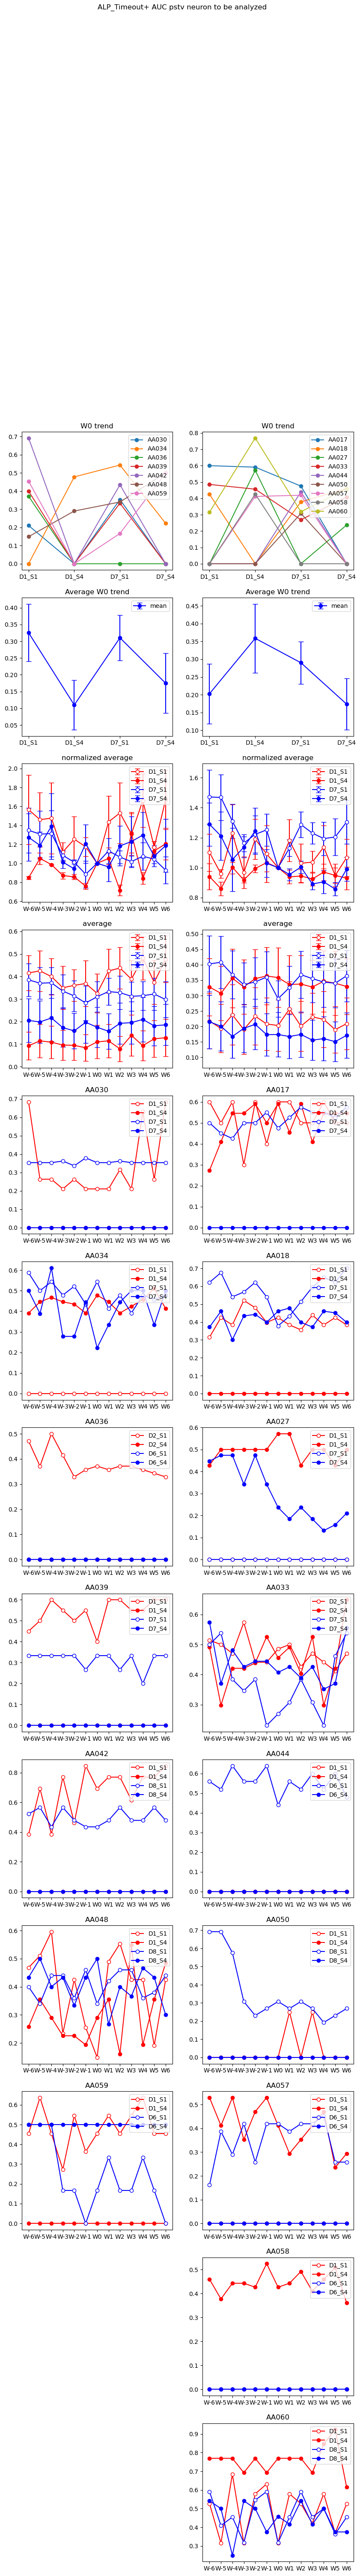

In [102]:
plot_figures(saline, coke, "AUC", "analyzed neuron")

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  4.666667  1.050000  1.590909  2.200000  0.800000  2.428571   
D1_S1 W-5  4.000000  1.050000  1.409091  2.000000  0.800000  2.142857   
D1_S1 W-4  3.333333  1.350000  1.409091  1.600000  1.000000  1.571429   
D1_S1 W-3  1.333333  2.100000  1.318182  1.600000  1.000000  2.857143   
D1_S1 W-2  3.000000  2.450000  1.363636  1.600000  1.400000  3.142857   
D1_S1 W-1  4.666667  1.150000  1.181818  1.400000  1.000000  1.571429   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.333333  1.300000  1.227273  1.200000  0.800000  2.714286   
D1_S1 W2   1.000000  1.350000  1.318182  1.000000  1.000000  2.857143   
D1_S1 W3   1.000000  0.950000  1.227273  1.000000  1.000000  4.857143   
D1_S1 W4   1.333333  0.800000  1.090909  1.200000  0.800000  4.142857   
D1_S1 W5   1.000000  1.050000  1.227273  1.600000  0.800000  2.571429   
D1_S1 W6   3.000000  1.600000  1.136364  1.600000  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.214286  0.978723  0.682927  0.538462  1.166667  0.685714   1.00   
D1_S1 W-5  0.357143  0.978723  0.780488  0.615385  1.166667  0.742857   0.80   
D1_S1 W-4  0.500000  0.851064  0.780488  0.769231  1.000000  0.885714   0.60   
D1_S1 W-3  0.928571  0.510638  0.829268  0.769231  1.000000  0.657143   1.80   
D1_S1 W-2  0.571429  0.382979  0.804878  0.769231  0.833333  0.600000   1.20   
D1_S1 W-1  0.285714  0.914894  0.902439  0.846154  1.000000  0.885714   0.60   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   0.928571  0.872340  0.878049  0.923077  1.333333  0.657143   1.20   
D1_S1 W2   1.000000  0.851064  0.829268  1.000000  1.000000  0.657143   1.60   
D1_S1 W3   1.000000  1.021277  0.878049  1.000000  1.000000  0.228571   1.60   
D1_S1 W4   0.928571  1.063830  0.951220  0.923077  1.166667  0.371429   0.60   
D1_S1 W5   1.000000  0.978723  0.878049 

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.428571  0.978723  0.800000  0.923077  1.833333  0.542857   1.50   
D1_S1 W-5  1.000000  1.063830  0.950000  1.076923  1.500000  0.628571   1.75   
D1_S1 W-4  1.000000  0.851064  1.000000  1.000000  1.000000  0.514286   2.00   
D1_S1 W-3  1.071429  0.723404  0.900000  1.000000  1.333333  0.657143   1.75   
D1_S1 W-2  0.785714  0.404255  1.050000  0.923077  1.166667  0.342857   1.00   
D1_S1 W-1  0.285714  0.808511  1.000000  0.846154  1.166667  0.514286   0.75   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   0.928571  0.680851  0.825000  0.769231  1.166667  0.628571   1.25   
D1_S1 W2   1.000000  1.000000  0.875000  0.923077  0.666667  0.571429   2.00   
D1_S1 W3   0.785714  1.085106  0.700000  1.000000  0.500000  0.257143   2.25   
D1_S1 W4   0.285714  0.978723  0.800000  1.076923  0.666667  0.800000   0.50   
D1_S1 W5   0.785714  1.000000  0.800000 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.666667  1.000000  1.347826  1.200000  0.200000  3.285714   
D1_S1 W-5  1.000000  0.850000  1.043478  1.000000  0.600000  3.000000   
D1_S1 W-4  1.333333  1.300000  1.000000  1.000000  1.000000  3.285714   
D1_S1 W-3  0.666667  1.600000  1.130435  1.000000  0.800000  2.714286   
D1_S1 W-2  2.000000  2.400000  0.913043  1.200000  1.000000  4.428571   
D1_S1 W-1  4.333333  1.400000  1.000000  1.400000  1.000000  3.428571   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.666667  1.750000  1.304348  1.600000  1.000000  2.857143   
D1_S1 W2   1.333333  1.000000  1.217391  1.200000  1.400000  3.285714   
D1_S1 W3   2.000000  0.750000  1.478261  1.000000  1.800000  4.714286   
D1_S1 W4   4.333333  0.950000  1.347826  0.800000  1.400000  2.000000   
D1_S1 W5   2.000000  1.000000  1.304348  1.600000  1.000000  1.000000   
D1_S1 W6   4.333333  1.750000  1.000000  1.400000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.625000  1.031250  1.357143  1.000000  0.666667  1.571429   
D1_S1 W-5  1.750000  0.656250  1.357143  1.000000  1.333333  1.571429   
D1_S1 W-4  1.375000  0.750000  1.250000  1.000000  0.666667  0.428571   
D1_S1 W-3  1.125000  0.718750  1.142857  0.600000  1.166667  2.428571   
D1_S1 W-2  1.750000  1.437500  1.142857  0.600000  0.666667  0.857143   
D1_S1 W-1  0.375000  1.375000  0.821429  1.200000  1.000000  1.000000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.250000  0.656250  1.142857  1.100000  1.000000  0.857143   
D1_S1 W2   0.375000  0.781250  1.357143  0.900000  1.000000  1.071429   
D1_S1 W3   0.375000  1.437500  0.964286  0.700000  0.666667  1.714286   
D1_S1 W4   1.500000  0.750000  1.035714  1.100000  0.666667  2.428571   
D1_S1 W5   0.500000  0.843750  1.071429  0.600000  0.666667  2.285714   
D1_S1 W6   0.375000  0.750000  1.178571  0.700000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.555556  0.970588  0.714286  1.000000  1.600000  0.689655   
D1_S1 W-5  0.333333  1.352941  0.714286  1.000000  0.800000  0.689655   
D1_S1 W-4  0.666667  1.235294  0.800000  1.000000  1.400000  1.241379   
D1_S1 W-3  0.888889  1.264706  0.885714  1.500000  1.000000  0.275862   
D1_S1 W-2  0.444444  0.617647  0.885714  1.500000  1.600000  1.068966   
D1_S1 W-1  1.555556  0.676471  1.142857  0.750000  1.000000  0.965517   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.666667  1.352941  0.885714  0.875000  1.000000  1.068966   
D1_S1 W2   1.555556  1.205882  0.714286  1.125000  1.000000  0.931034   
D1_S1 W3   1.555556  0.617647  1.028571  1.375000  1.400000  0.620690   
D1_S1 W4   0.555556  1.235294  0.971429  0.875000  1.600000  0.275862   
D1_S1 W5   1.444444  1.176471  0.942857  1.500000  1.400000  0.379310   
D1_S1 W6   1.555556  1.235294  0.857143  1.375000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.285714  0.975610  0.710526  1.000000  1.750000  0.518519   
D1_S1 W-5  0.142857  0.975610  0.736842  1.111111  0.750000  0.481481   
D1_S1 W-4  0.928571  1.146341  0.763158  1.000000  1.500000  1.259259   
D1_S1 W-3  1.000000  1.097561  0.894737  0.777778  0.250000  0.407407   
D1_S1 W-2  0.357143  0.634146  0.894737  1.444444  1.750000  1.074074   
D1_S1 W-1  1.000000  0.536585  1.052632  0.888889  1.000000  1.037037   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  0.780488  0.763158  0.888889  0.750000  1.074074   
D1_S1 W2   1.000000  1.024390  0.921053  1.000000  1.000000  1.148148   
D1_S1 W3   1.000000  0.536585  0.842105  1.222222  0.500000  0.814815   
D1_S1 W4   0.285714  1.097561  0.842105  1.000000  1.000000  0.518519   
D1_S1 W5   0.928571  1.048780  0.815789  1.000000  1.000000  0.555556   
D1_S1 W6   1.000000  0.731707  1.131579  1.111111  

              AA030     AA034    AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  4.333333  1.080000  1.44000  1.000000  0.625000  1.866667   1.50   
D1_S1 W-5  5.000000  1.080000  1.40000  0.888889  1.125000  2.000000   1.25   
D1_S1 W-4  1.666667  0.800000  1.36000  1.000000  0.625000  0.533333   2.00   
D1_S1 W-3  1.333333  0.880000  1.16000  1.222222  1.375000  2.066667   0.50   
D1_S1 W-2  4.000000  1.640000  1.16000  0.555556  0.625000  0.866667   0.25   
D1_S1 W-1  1.333333  1.760000  0.92000  1.111111  1.000000  0.933333   1.25   
D1_S1 W0   1.000000  1.000000  1.00000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.000000  1.360000  1.36000  1.111111  1.125000  0.866667   1.25   
D1_S1 W2   1.333333  0.960000  1.12000  1.000000  0.875000  0.800000   0.75   
D1_S1 W3   1.333333  1.760000  1.24000  0.777778  1.250000  1.400000   1.25   
D1_S1 W4   4.333333  0.880000  1.24000  1.000000  1.000000  1.933333   1.25   
D1_S1 W5   1.666667  0.920000  1.28000  1.000000  1.

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  4.333333  1.608696  0.825000  1.333333  0.750000  3.333333   
D1_S1 W-5  3.666667  0.956522  0.775000  1.111111  1.000000  4.000000   
D1_S1 W-4  4.333333  1.826087  0.725000  1.111111  1.750000  2.500000   
D1_S1 W-3  1.333333  1.913043  0.850000  0.666667  1.000000  1.333333   
D1_S1 W-2  5.000000  1.695652  0.925000  1.000000  1.000000  3.500000   
D1_S1 W-1  4.666667  1.695652  0.650000  0.888889  1.250000  3.333333   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.333333  1.260870  0.650000  0.888889  1.250000  3.666667   
D1_S1 W2   1.333333  1.260870  0.750000  1.111111  1.750000  0.833333   
D1_S1 W3   1.333333  1.478261  0.600000  1.000000  1.250000  5.166667   
D1_S1 W4   2.666667  1.000000  0.675000  1.111111  1.000000  5.500000   
D1_S1 W5   1.333333  1.130435  0.550000  1.000000  0.500000  3.166667   
D1_S1 W6   3.333333  1.608696  0.825000  1.111111  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.357143  0.697674  1.304348  0.666667  1.285714  0.638889   
D1_S1 W-5  0.428571  1.023256  1.391304  0.888889  1.000000  0.500000   
D1_S1 W-4  0.357143  0.558140  1.478261  0.888889  0.714286  0.750000   
D1_S1 W-3  0.928571  0.534884  1.260870  1.333333  1.000000  0.944444   
D1_S1 W-2  0.142857  0.651163  1.130435  1.000000  1.000000  0.611111   
D1_S1 W-1  0.285714  0.651163  1.608696  1.111111  0.857143  0.638889   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.928571  0.883721  1.608696  1.111111  0.857143  0.555556   
D1_S1 W2   0.928571  0.883721  1.434783  0.888889  0.714286  1.027778   
D1_S1 W3   0.928571  0.744186  1.695652  1.000000  0.857143  0.333333   
D1_S1 W4   0.642857  1.000000  1.565217  0.888889  1.000000  0.250000   
D1_S1 W5   0.928571  0.953488  1.782609  1.000000  1.428571  0.638889   
D1_S1 W6   0.500000  0.697674  1.304348  0.888889  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.285714  0.630435  0.696970  0.583333  1.500000  0.648649   1.00   
D1_S1 W-5  0.785714  0.956522  1.333333  0.666667  0.750000  0.540541   1.00   
D1_S1 W-4  0.571429  0.630435  1.151515  0.583333  0.500000  0.729730   1.75   
D1_S1 W-3  1.000000  0.586957  0.969697  0.916667  0.500000  0.918919   1.25   
D1_S1 W-2  0.857143  0.543478  1.151515  0.833333  1.250000  0.594595   2.00   
D1_S1 W-1  0.714286  0.760870  0.969697  0.916667  0.750000  0.540541   0.75   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.000000  0.739130  1.090909  0.833333  0.000000  0.486486   0.75   
D1_S1 W2   0.928571  0.869565  1.151515  0.750000  0.500000  0.918919   1.00   
D1_S1 W3   1.000000  0.695652  1.030303  0.916667  0.250000  0.324324   1.00   
D1_S1 W4   0.714286  0.978261  1.121212  0.833333  0.500000  0.594595   1.25   
D1_S1 W5   0.785714  0.869565  1.060606 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.250000  1.809524  1.333333  1.833333  0.714286  3.600000   
D1_S1 W-5  1.500000  1.095238  0.633333  1.666667  1.285714  4.600000   
D1_S1 W-4  2.250000  1.809524  0.833333  1.833333  1.428571  3.000000   
D1_S1 W-3  1.000000  1.904762  1.033333  1.166667  1.428571  1.600000   
D1_S1 W-2  1.250000  1.952381  0.833333  1.333333  0.857143  4.000000   
D1_S1 W-1  1.750000  1.476190  1.033333  1.166667  1.285714  4.600000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  1.523810  0.900000  1.333333  1.714286  4.800000   
D1_S1 W2   1.250000  1.285714  0.833333  1.500000  1.428571  1.600000   
D1_S1 W3   1.000000  1.619048  0.966667  1.166667  1.571429  6.200000   
D1_S1 W4   1.750000  1.047619  0.866667  1.333333  1.428571  4.000000   
D1_S1 W5   1.500000  1.238095  0.933333  1.333333  1.000000  2.000000   
D1_S1 W6   3.250000  1.619048  0.766667  1.833333  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  2.800000  1.030303  0.852941  1.500000  1.000000  2.875000   
D1_S1 W-5  1.800000  1.030303  1.029412  1.250000  1.250000  2.750000   
D1_S1 W-4  2.400000  1.030303  1.000000  1.250000  1.000000  2.250000   
D1_S1 W-3  1.200000  1.030303  0.852941  0.875000  1.750000  1.750000   
D1_S1 W-2  2.800000  1.030303  1.000000  1.250000  1.000000  3.000000   
D1_S1 W-1  1.000000  1.000000  0.676471  1.375000  2.000000  0.750000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  0.909091  0.823529  1.375000  1.000000  2.750000   
D1_S1 W2   1.800000  0.848485  0.852941  1.125000  1.250000  2.875000   
D1_S1 W3   0.800000  1.000000  0.647059  0.750000  1.000000  2.250000   
D1_S1 W4   2.600000  0.969697  0.852941  1.125000  1.000000  4.250000   
D1_S1 W5   1.200000  0.848485  0.735294  1.000000  0.750000  2.375000   
D1_S1 W6   2.200000  0.757576  0.764706  1.000000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.333333  0.969697  1.172414  0.600000  0.875000  0.558824   
D1_S1 W-5  0.666667  0.969697  0.965517  0.800000  0.750000  0.588235   
D1_S1 W-4  0.416667  0.969697  1.000000  0.800000  1.000000  0.705882   
D1_S1 W-3  0.916667  0.969697  1.172414  1.100000  0.625000  0.852941   
D1_S1 W-2  0.333333  0.969697  1.000000  0.800000  0.875000  0.529412   
D1_S1 W-1  1.000000  1.000000  1.379310  0.700000  0.500000  1.058824   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  1.121212  1.206897  0.700000  0.875000  0.617647   
D1_S1 W2   0.666667  1.181818  1.172414  0.900000  0.750000  0.558824   
D1_S1 W3   1.083333  1.000000  1.413793  1.200000  1.000000  0.705882   
D1_S1 W4   0.416667  1.030303  1.172414  0.900000  0.875000  0.235294   
D1_S1 W5   0.916667  1.181818  1.310345  1.000000  1.125000  0.676471   
D1_S1 W6   0.500000  1.242424  1.275862  1.000000  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.307692       NaN  0.846154  0.769231  1.000000  0.656250   1.25   
D1_S1 W-5  0.923077       NaN  1.000000  0.769231  0.333333  0.625000   0.75   
D1_S1 W-4  0.846154       NaN  0.794872  0.538462  1.666667  0.562500   1.00   
D1_S1 W-3  1.000000       NaN  0.820513  0.846154  0.000000  1.000000   1.00   
D1_S1 W-2  0.769231       NaN  1.025641  0.846154  1.333333  0.531250   0.50   
D1_S1 W-1  1.000000       NaN  0.820513  0.769231  0.000000  1.031250   1.00   
D1_S1 W0   1.000000       NaN  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.076923       NaN  0.897436  0.692308  0.333333  0.656250   0.75   
D1_S1 W2   0.846154       NaN  1.000000  0.615385  1.000000  0.468750   1.50   
D1_S1 W3   1.000000       NaN  0.923077  0.846154  0.333333  0.750000   0.75   
D1_S1 W4   0.461538       NaN  0.948718  0.692308  0.333333  0.625000   1.00   
D1_S1 W5   0.769231       NaN  0.871795 

              AA030     AA034     AA036  AA039     AA042     AA048  AA059  \
D1_S1 W-6  2.600000       NaN  1.250000    1.6  1.000000  2.000000    1.0   
D1_S1 W-5  1.000000       NaN  1.000000    1.6  1.222222  2.090909    1.4   
D1_S1 W-4  1.200000       NaN  1.333333    2.2  0.666667  2.181818    1.0   
D1_S1 W-3  1.000000       NaN  1.291667    1.4  1.333333  1.000000    1.0   
D1_S1 W-2  1.400000       NaN  0.958333    1.4  0.888889  2.272727    1.6   
D1_S1 W-1  1.000000       NaN  1.291667    1.6  1.333333  0.818182    1.0   
D1_S1 W0   1.000000       NaN  1.000000    1.0  1.000000  1.000000    1.0   
D1_S1 W1   0.800000       NaN  1.166667    1.8  1.222222  2.000000    1.4   
D1_S1 W2   1.200000       NaN  1.000000    2.0  1.000000  2.454545    0.8   
D1_S1 W3   1.000000       NaN  1.125000    1.4  1.222222  1.636364    1.4   
D1_S1 W4   2.200000       NaN  1.083333    1.8  1.222222  2.090909    1.2   
D1_S1 W5   1.400000       NaN  1.208333    1.8  1.000000  0.636364    1.2   

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

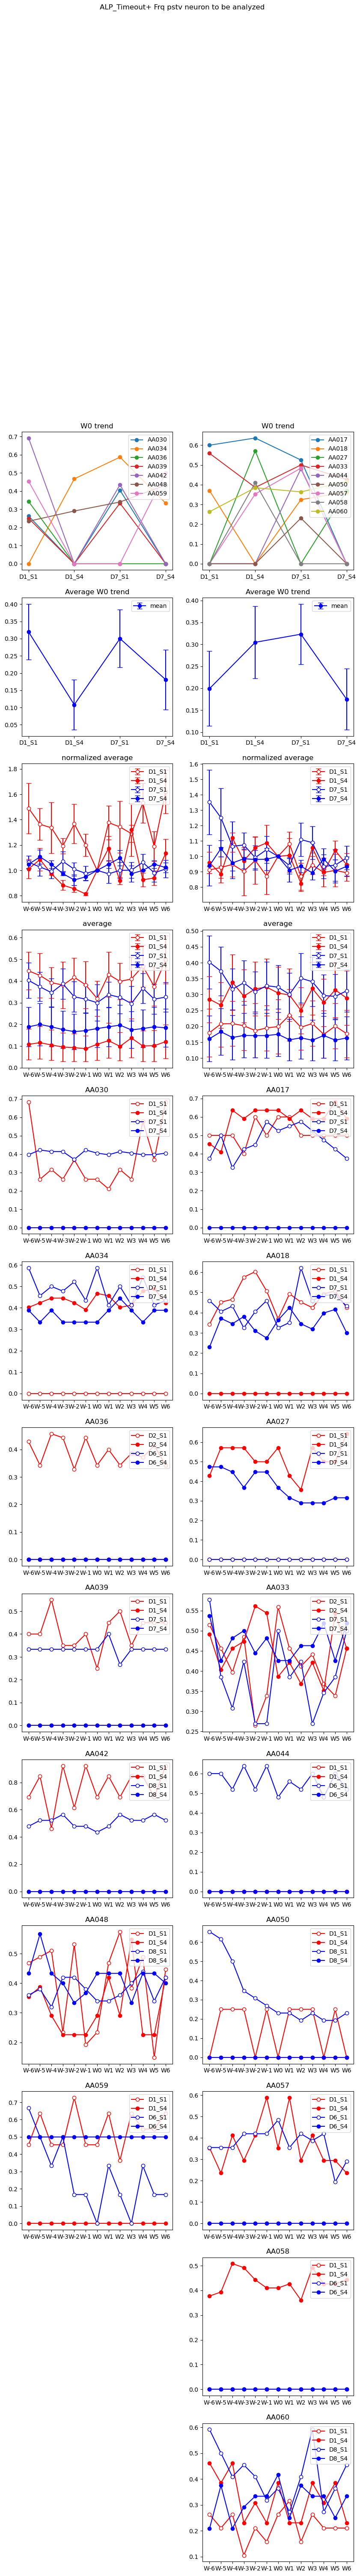

In [103]:
plot_figures(saline, coke, "Frq", "analyzed neuron")

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.500000  1.294118  1.666667  0.500000  1.000000  1.833333   
D1_S1 W-5  3.750000  1.235294  1.904762  0.750000  1.500000  2.833333   
D1_S1 W-4  3.500000  1.352941  1.571429  1.000000  1.500000  5.333333   
D1_S1 W-3  2.500000  2.000000  1.714286  0.875000  1.500000  5.333333   
D1_S1 W-2  1.250000  1.058824  1.238095  0.875000  1.500000  2.333333   
D1_S1 W-1  2.500000  2.294118  1.428571  1.250000  1.000000  1.333333   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.250000  1.882353  1.142857  0.750000  1.000000  3.000000   
D1_S1 W2   1.000000  1.294118  1.428571  0.875000  1.250000  4.500000   
D1_S1 W3   0.750000  1.235294  1.142857  1.125000  1.250000  5.666667   
D1_S1 W4   1.000000  1.882353  1.095238  0.875000  1.250000  5.333333   
D1_S1 W5   1.000000  1.294118  1.190476  0.750000  1.000000  2.000000   
D1_S1 W6   2.500000  2.235294  1.142857  1.000000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.307692  0.897959  0.666667  1.300000  1.000000  0.861111   
D1_S1 W-5  0.153846  0.938776  0.547619  1.200000  0.714286  0.694444   
D1_S1 W-4  0.307692  0.877551  0.714286  1.000000  0.714286  0.305556   
D1_S1 W-3  0.538462  0.653061  0.642857  1.100000  0.714286  0.277778   
D1_S1 W-2  0.923077  1.000000  0.880952  1.100000  0.714286  0.777778   
D1_S1 W-1  0.538462  0.571429  0.785714  0.800000  1.000000  0.944444   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.923077  0.693878  0.928571  1.200000  1.142857  0.666667   
D1_S1 W2   1.000000  0.918367  0.785714  1.100000  0.857143  0.416667   
D1_S1 W3   1.076923  0.938776  0.928571  0.900000  0.857143  0.222222   
D1_S1 W4   1.000000  0.714286  0.952381  1.100000  0.857143  0.277778   
D1_S1 W5   1.000000  0.918367  0.904762  1.200000  1.000000  0.861111   
D1_S1 W6   0.538462  0.591837  0.928571  1.000000  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.428571  0.780000  0.904762  1.100000  1.571429  0.861111   
D1_S1 W-5  0.857143  1.060000  0.952381  1.300000  1.142857  0.805556   
D1_S1 W-4  0.857143  0.920000  0.928571  1.000000  0.714286  0.277778   
D1_S1 W-3  1.000000  0.520000  0.809524  1.400000  1.285714  0.277778   
D1_S1 W-2  0.857143  0.800000  1.023810  1.400000  1.000000  0.416667   
D1_S1 W-1  0.357143  0.540000  0.952381  0.900000  1.285714  0.944444   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.928571  0.600000  0.928571  1.200000  0.714286  0.583333   
D1_S1 W2   1.000000  0.760000  0.761905  1.000000  0.714286  0.583333   
D1_S1 W3   0.928571  0.900000  0.785714  0.600000  0.285714  0.222222   
D1_S1 W4   0.500000  0.740000  0.761905  1.000000  0.714286  0.444444   
D1_S1 W5   0.285714  1.040000  0.714286  1.200000  1.285714  0.972222   
D1_S1 W6   0.357143  0.640000  0.928571  1.000000  

            AA030     AA034     AA036     AA039     AA042     AA048     AA059  \
D1_S1 W-6  2.7500  1.647059  1.190476  0.875000  0.200000  2.000000  0.800000   
D1_S1 W-5  1.2500  0.764706  1.095238  0.625000  0.800000  2.166667  0.400000   
D1_S1 W-4  1.2500  1.235294  1.142857  1.000000  1.200000  5.333333  1.200000   
D1_S1 W-3  1.0000  2.411765  1.380952  0.625000  0.600000  5.333333  1.000000   
D1_S1 W-2  1.2500  1.529412  0.952381  0.625000  1.000000  4.500000  0.800000   
D1_S1 W-1  3.0000  2.352941  1.095238  1.125000  0.600000  1.333333  1.200000   
D1_S1 W0   1.0000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.2500  2.176471  1.142857  0.750000  1.200000  3.666667  0.800000   
D1_S1 W2   1.0000  1.705882  1.476190  1.000000  1.200000  3.666667  0.600000   
D1_S1 W3   1.2500  1.294118  1.428571  1.500000  2.000000  5.666667  0.200000   
D1_S1 W4   2.5000  1.764706  1.476190  1.000000  1.200000  4.333333  1.600000   
D1_S1 W5   3.2500  0.823529 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  1.000000  0.843750  1.000000  1.571429  0.571429  1.214286   
D1_S1 W-5  1.272727  0.687500  1.000000  1.285714  1.142857  1.214286   
D1_S1 W-4  1.000000  0.843750  0.972222  0.857143  0.714286  0.642857   
D1_S1 W-3  1.181818  1.093750  0.944444  1.142857  1.000000  1.928571   
D1_S1 W-2  1.272727  1.250000  0.944444  0.571429  0.857143  1.428571   
D1_S1 W-1  0.272727  1.031250  0.777778  1.142857  1.000000  2.000000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.181818  0.968750  1.055556  1.142857  0.714286  1.857143   
D1_S1 W2   0.363636  0.843750  0.944444  1.000000  0.857143  1.428571   
D1_S1 W3   0.272727  0.843750  0.805556  1.285714  0.571429  1.714286   
D1_S1 W4   1.090909  0.937500  0.805556  1.714286  0.857143  2.357143   
D1_S1 W5   0.363636  0.968750  0.805556  0.857143  0.857143  2.285714   
D1_S1 W6   0.272727  1.125000  0.805556  1.571429  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  1.000000  1.142857  1.000000  0.636364  1.400000  0.862069  1.500   
D1_S1 W-5  0.500000  1.257143  1.000000  0.818182  0.800000  0.862069  2.000   
D1_S1 W-4  1.000000  1.142857  1.037037  1.090909  1.200000  1.137931  0.750   
D1_S1 W-3  0.833333  0.885714  1.074074  0.909091  1.000000  0.517241  2.000   
D1_S1 W-2  0.666667  0.771429  1.074074  1.272727  1.000000  0.793103  1.500   
D1_S1 W-1  2.333333  0.942857  1.296296  0.909091  1.000000  0.482759  1.000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000   
D1_S1 W1   2.500000  1.028571  0.925926  0.909091  1.200000  0.551724  2.000   
D1_S1 W2   2.166667  1.142857  1.074074  1.000000  1.000000  0.793103  1.250   
D1_S1 W3   2.333333  1.142857  1.259259  0.818182  1.400000  0.620690  1.000   
D1_S1 W4   0.833333  1.057143  1.259259  0.545455  1.000000  0.310345  0.250   
D1_S1 W5   2.166667  1.028571  1.259259 

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.333333  1.023256  0.818182  1.100000  1.750000  0.700000   1.50   
D1_S1 W-5  0.333333  0.790698  1.000000  0.700000  1.500000  0.600000   2.25   
D1_S1 W-4  0.916667  1.000000  0.878788  1.000000  1.750000  1.066667   0.75   
D1_S1 W-3  1.166667  0.906977  1.060606  1.000000  1.250000  0.466667   1.50   
D1_S1 W-2  0.916667  0.674419  0.969697  1.400000  1.500000  0.666667   1.50   
D1_S1 W-1  1.166667  0.604651  1.181818  1.100000  1.750000  0.633333   1.00   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.166667  0.697674  0.939394  0.600000  1.250000  0.466667   1.75   
D1_S1 W2   1.166667  0.906977  1.060606  1.200000  1.000000  1.033333   1.50   
D1_S1 W3   1.166667  0.558140  0.969697  1.000000  1.500000  0.966667   1.25   
D1_S1 W4   0.333333  1.023256  1.181818  0.700000  0.750000  0.633333   0.75   
D1_S1 W5   1.083333  0.697674  1.000000 

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  2.600000  1.000000  1.200000  0.875000  0.714286  1.692308   0.80   
D1_S1 W-5  2.600000  1.391304  1.000000  1.375000  0.714286  1.846154   0.20   
D1_S1 W-4  1.200000  1.000000  1.133333  1.000000  0.714286  0.846154   1.40   
D1_S1 W-3  0.800000  1.217391  0.933333  1.000000  0.857143  2.153846   0.80   
D1_S1 W-2  1.200000  1.652174  1.033333  0.500000  0.714286  1.769231   0.80   
D1_S1 W-1  0.800000  1.782609  0.800000  0.875000  0.714286  1.769231   1.20   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   0.800000  1.608696  1.066667  1.500000  0.857143  2.230769   0.60   
D1_S1 W2   0.800000  1.217391  0.933333  0.750000  1.142857  0.923077   0.80   
D1_S1 W3   0.800000  1.826087  1.033333  1.000000  0.714286  1.000000   1.00   
D1_S1 W4   2.600000  1.000000  0.800000  1.375000  1.285714  1.769231   1.40   
D1_S1 W5   1.000000  1.608696  1.000000 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.250000  1.423077  1.000000  0.818182  0.500000  2.428571   
D1_S1 W-5  3.750000  0.807692  0.944444  0.545455  1.000000  3.428571   
D1_S1 W-4  2.750000  1.038462  1.055556  0.545455  1.000000  4.428571   
D1_S1 W-3  1.250000  1.000000  1.027778  0.545455  0.750000  3.142857   
D1_S1 W-2  3.000000  1.730769  1.083333  0.818182  0.750000  1.857143   
D1_S1 W-1  3.000000  1.692308  0.916667  0.636364  0.500000  1.285714   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.750000  1.230769  0.666667  0.545455  0.500000  4.285714   
D1_S1 W2   1.000000  1.038462  0.805556  0.818182  0.875000  2.428571   
D1_S1 W3   0.750000  0.923077  0.694444  0.909091  0.500000  4.571429   
D1_S1 W4   1.000000  1.230769  0.777778  0.727273  0.750000  4.571429   
D1_S1 W5   1.500000  0.884615  0.777778  0.545455  0.250000  2.000000   
D1_S1 W6   2.750000  1.692308  0.888889  1.272727  

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.384615  0.731707  1.000000  1.285714  1.750000  0.714286   
D1_S1 W-5  0.153846  1.121951  1.074074  1.714286  1.000000  0.514286   
D1_S1 W-4  0.461538  0.975610  0.925926  1.714286  1.000000  0.342857   
D1_S1 W-3  0.923077  1.000000  0.962963  1.714286  1.250000  0.600000   
D1_S1 W-2  0.384615  0.536585  0.888889  1.285714  1.250000  0.857143   
D1_S1 W-1  0.384615  0.560976  1.111111  1.571429  2.000000  0.942857   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.076923  0.829268  1.444444  1.714286  1.750000  0.371429   
D1_S1 W2   1.000000  0.975610  1.259259  1.285714  1.250000  0.714286   
D1_S1 W3   1.076923  1.024390  1.407407  1.142857  1.750000  0.285714   
D1_S1 W4   1.000000  0.853659  1.296296  1.428571  1.250000  0.314286   
D1_S1 W5   0.846154  1.048780  1.296296  1.714286  2.500000  0.828571   
D1_S1 W6   0.461538  0.560976  1.148148  0.714286  

              AA030     AA034     AA036     AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.285714  0.617021  0.550000  1.100000  1.166667  0.648649   1.75   
D1_S1 W-5  0.428571  1.063830  0.950000  0.900000  0.833333  0.513514   1.50   
D1_S1 W-4  0.857143  0.914894  0.775000  1.000000  1.333333  0.324324   1.75   
D1_S1 W-3  0.928571  0.829787  0.700000  0.900000  0.833333  0.648649   1.75   
D1_S1 W-2  0.857143  0.659574  0.800000  0.800000  1.333333  0.864865   1.50   
D1_S1 W-1  0.714286  0.680851  0.800000  0.800000  1.000000  0.837838   1.00   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.00   
D1_S1 W1   1.000000  0.702128  0.900000  0.600000  1.000000  0.432432   1.25   
D1_S1 W2   0.928571  0.574468  1.000000  0.900000  0.500000  0.918919   1.50   
D1_S1 W3   1.000000  0.680851  0.875000  0.600000  0.833333  0.243243   1.25   
D1_S1 W4   0.785714  0.680851  1.025000  0.900000  0.500000  0.648649   1.00   
D1_S1 W5   0.714286  0.914894  0.850000 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  3.250000  1.900000  1.782609  0.875000  1.000000  3.600000   
D1_S1 W-5  2.750000  0.800000  1.086957  1.125000  1.200000  4.600000   
D1_S1 W-4  1.250000  1.150000  1.391304  1.000000  0.800000  6.200000   
D1_S1 W-3  1.250000  1.400000  1.521739  1.125000  1.200000  3.600000   
D1_S1 W-2  1.250000  1.800000  1.347826  1.250000  0.800000  2.200000   
D1_S1 W-1  1.750000  1.700000  1.347826  1.250000  1.000000  2.400000   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   1.000000  1.650000  1.173913  1.500000  1.000000  5.200000   
D1_S1 W2   1.250000  2.000000  1.000000  1.125000  1.800000  1.600000   
D1_S1 W3   1.000000  1.700000  1.217391  1.500000  1.200000  6.600000   
D1_S1 W4   1.500000  1.700000  0.956522  1.125000  1.800000  3.600000   
D1_S1 W5   1.750000  1.150000  1.260870  1.000000  1.000000  1.600000   
D1_S1 W6   3.250000  1.750000  1.086957  1.375000  

              AA030     AA034     AA036     AA039  AA042     AA048     AA059  \
D1_S1 W-6  3.000000  1.031250  1.114286  0.666667  0.625  3.500000  0.666667   
D1_S1 W-5  3.750000  1.031250  1.171429  0.583333  1.000  4.166667  0.333333   
D1_S1 W-4  2.500000  1.031250  1.142857  0.666667  0.625  5.333333  0.833333   
D1_S1 W-3  1.500000  1.062500  0.914286  0.666667  0.875  2.500000  0.333333   
D1_S1 W-2  3.000000  1.031250  1.057143  0.750000  0.625  1.666667  1.000000   
D1_S1 W-1  1.250000  1.000000  0.800000  0.583333  0.875  1.333333  0.666667   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000  1.000000  1.000000   
D1_S1 W1   1.500000  1.000000  0.742857  0.666667  0.750  3.666667  0.666667   
D1_S1 W2   2.500000  0.843750  1.028571  0.583333  0.875  5.166667  1.000000   
D1_S1 W3   1.000000  0.906250  0.628571  0.583333  0.500  5.000000  0.833333   
D1_S1 W4   2.000000  0.843750  1.057143  0.666667  0.875  6.166667  0.666667   
D1_S1 W5   2.000000  0.968750  0.771429 

              AA030     AA034     AA036     AA039     AA042     AA048  \
D1_S1 W-6  0.384615  0.970588  0.857143  1.666667  1.500000  0.611111   
D1_S1 W-5  0.153846  0.970588  0.785714  1.833333  1.000000  0.472222   
D1_S1 W-4  0.538462  0.970588  0.821429  1.666667  1.500000  0.277778   
D1_S1 W-3  0.846154  0.941176  1.107143  1.666667  1.250000  0.750000   
D1_S1 W-2  0.384615  0.970588  0.928571  1.500000  1.500000  0.888889   
D1_S1 W-1  0.923077  1.000000  1.250000  1.833333  1.250000  0.944444   
D1_S1 W0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
D1_S1 W1   0.846154  1.029412  1.321429  1.666667  1.250000  0.583333   
D1_S1 W2   0.538462  1.176471  0.964286  1.833333  1.250000  0.333333   
D1_S1 W3   1.000000  1.117647  1.464286  1.833333  1.750000  0.361111   
D1_S1 W4   0.692308  1.176471  0.928571  1.666667  1.250000  0.138889   
D1_S1 W5   0.692308  1.058824  1.285714  1.833333  2.250000  0.805556   
D1_S1 W6   0.615385  1.029412  1.285714  1.166667  

              AA030     AA034  AA036  AA039     AA042     AA048  AA059  \
D1_S1 W-6  0.285714       NaN  0.675    1.1  1.000000  0.628571   1.25   
D1_S1 W-5  0.785714       NaN  0.800    1.0  0.857143  0.542857   1.50   
D1_S1 W-4  0.928571       NaN  0.625    0.6  1.000000  0.342857   1.00   
D1_S1 W-3  0.857143       NaN  0.775    0.7  0.857143  0.857143   1.75   
D1_S1 W-2  0.857143       NaN  0.975    0.7  0.857143  0.914286   1.00   
D1_S1 W-1  0.857143       NaN  0.875    0.7  0.857143  0.942857   1.25   
D1_S1 W0   1.000000       NaN  1.000    1.0  1.000000  1.000000   1.00   
D1_S1 W1   0.928571       NaN  0.925    0.7  0.857143  0.628571   1.25   
D1_S1 W2   0.857143       NaN  0.875    0.8  0.571429  0.400000   1.25   
D1_S1 W3   0.857143       NaN  1.050    0.5  0.857143  0.742857   1.25   
D1_S1 W4   0.857143       NaN  0.750    0.9  0.571429  0.542857   1.25   
D1_S1 W5   0.500000       NaN  0.900    0.8  1.142857  1.000000   1.00   
D1_S1 W6   0.285714       NaN  1.000  

              AA030     AA034     AA036  AA039     AA042     AA048  AA059  \
D1_S1 W-6  3.250000       NaN  1.565217  0.875  1.000000  3.000000    1.0   
D1_S1 W-5  1.500000       NaN  1.347826  1.000  1.000000  3.285714    0.8   
D1_S1 W-4  1.250000       NaN  1.652174  1.500  1.000000  4.428571    1.2   
D1_S1 W-3  1.250000       NaN  1.391304  1.375  1.000000  1.857143    0.6   
D1_S1 W-2  1.250000       NaN  1.043478  1.375  1.000000  1.428571    1.0   
D1_S1 W-1  1.250000       NaN  1.217391  1.375  1.000000  1.285714    1.0   
D1_S1 W0   1.000000       NaN  1.000000  1.000  1.000000  1.000000    1.0   
D1_S1 W1   1.250000       NaN  1.130435  1.375  1.000000  3.000000    1.0   
D1_S1 W2   1.250000       NaN  1.217391  1.250  1.400000  4.142857    1.0   
D1_S1 W3   1.250000       NaN  0.913043  1.625  1.000000  2.285714    1.0   
D1_S1 W4   1.250000       NaN  1.434783  1.125  1.400000  3.285714    1.0   
D1_S1 W5   2.500000       NaN  1.173913  1.250  0.800000  1.000000    1.0   

<Figure size 640x480 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

<Figure size 1000x10000 with 0 Axes>

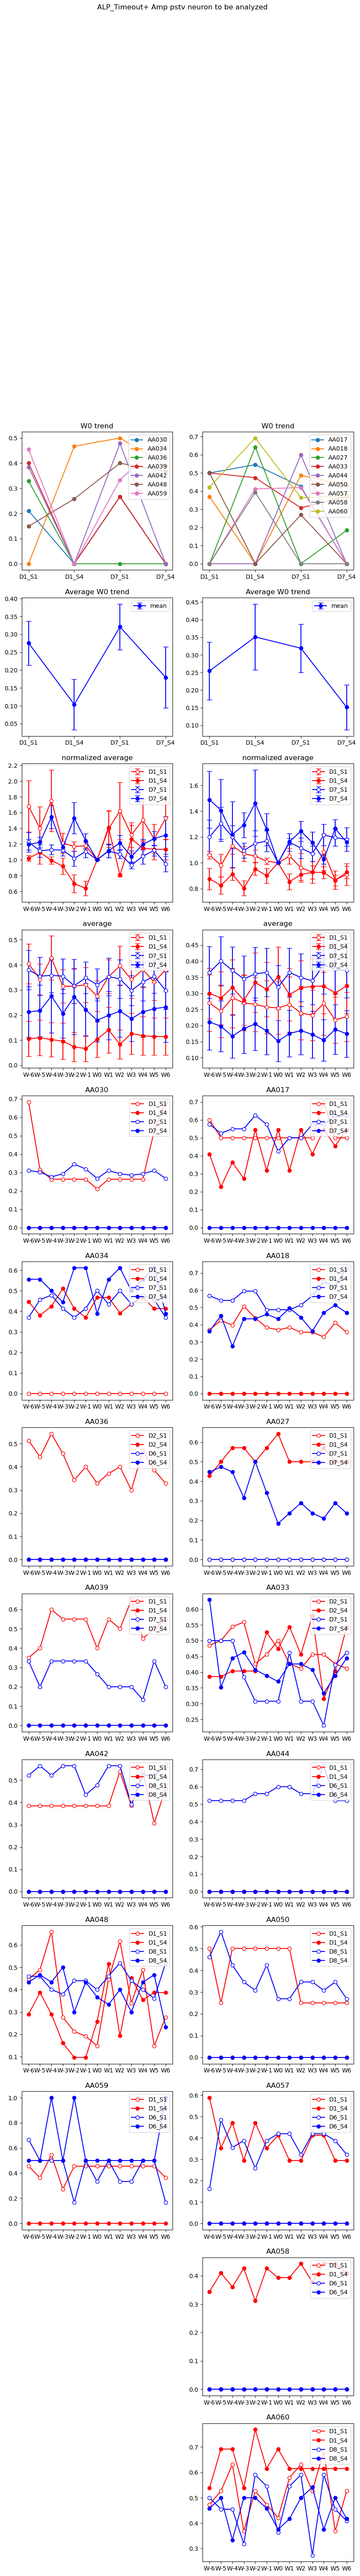

In [104]:
plot_figures(saline, coke, "Amp", "analyzed neuron")

# AUC